## A1 RESEARCH QUESTION
In initial Data Cleaning, the evaluation demonstrated how Bandwidth_GB_Year(BGY) was a major factor in Churn. Because this data set only has 1 year of data and BGY is by year, this analysis will make the assumption that Monthly charges has a relationship to BGY. While family size may have an impact on MonthlyCharges ie more phones, this would also mean more BGY. There is however no way to factor in insurance, payment plans and other fees. The biggest cost on a statement is assumed to be GB usage and so it seems a safe assumption to Make that Monthly Charges and BGY will have a close relationship.

The relationship between BGY and Churn will be re-evaluated. The relationship between BGY and MonthlyCharge will be explored and finally predictors for MonthlyCharge will be explored to answer the question;

## What are drivers(predictors) behind MonthlyCharges?"

Answering this question will give a better understanding into Customer behavior around Churn and allow for further analysis around ideal price points for Monthlycharges.

This report will attempt this by using both numeric and categorical data.

Note there is an next step to review survey data and sentiment, however due to bias for action we are focusing on only initial metrics before linking to sentiment. 

## A2 OBJECTIVES AND GOALS  (dev)

DATA PREPERATION
 - remove blanks, duplicates, unneeded characters or symbols
 - remove unwanted fields
 - impute missing values
EXPLORATORY DATA ANALYSIS(EDA)
 - review unistats
 - observe and interpret barcharts, historgrams, scatterplots

REVIEW RELATIONSHIP OF BGY TO CHURN
 - provide results of bivariate stats 
 
EXPLORE MONTHLYCHARGE TO BGY
 - review unistats
 - observe and interpret barcharts, histograms, scatterplots

FEATURE SELECTION
 - Remove statistically insignificant variables
 - Remove variables with unreliable statisitical inference(multicollinarity)
 
FIT THE MODEL
 
 
SUMMARIZE RESULTS



## B1 SUMMARY OF ASSUMPTIONS FOR MULTIPLE REGRESSION MODEL
 - Variable are normally distributed
 - Assumption of a Linear relationship between the independent and dependent variable.
 - Variables are measured without error
 - Assumption of Homescedasticity

The submission accurately summarizes the assumptions of a multiple regression model.

## B2 TOOL SELECTION BENEFIT
- python
- jupyter notebooks

The analysis will be conducted in Jupyter Notebooks using Python. Jupyter Notebooks is a graphical ease of use to present data analyis while also being allowed to code ad-hoc for any changes. 

While Python and R both have the required statistical packages, Python has additional packages if I wanted to use this analyis for production. Because this is to review customer churn, my assumption is this will be an ongoing effort and not a one time analysis. I have chosen python for production flexability. 

## B3 WHY MULTIPLE REGRESSION IS APPROPRIATE

Multiple regression is when there is one dependent variable that is going to be tested against two or more independent variables. The output will display the strength of the relationship between two or more independent variables and one dependent variable         
Because we have 1 dependendent variable in this data scenario and multiple predictors it makes the most sense to use multiple regression to explore the relationships. 
  

## C1 DATA GOALS
First goal is to remove any blanks, duplicates, or spaces. The data will also have Nans removed INF converted into INT. Item fields will be giving Business Acumen Names from data dictionary. Any records that still have missing values will be imputed. 

Next goal will be to create groups of fields will be created for potential exploration and analysis. Groups will be based on data type or domain understanding. 

Because of the number of categorial values get_dummies will be use over one hot encoding. This will allow for the the categorial values to be assessed numerically.

The final goal will be to take the target variable and review relationships with predictors. 

## C2 SUMMARY STATISTICS
unistats review of each variable will include mean, median, mode, min, max, range, standard devaiation, range.
Categorical variables will include counts of each time a category is observed. 

#### LIBRARIES
Common libraries used for working with data, stats, visualization and analysis. 
Before beginning Summary statistics all libraries are loaded for easy of management. This may not account for all libraries used for further exploration or experiments.

In [1]:
#LOAD LIBRARIES
# system
import sys, os

# Data
import pandas as pd
import numpy as np
import seaborn as sns


# stats
import scipy.stats as stats
import math
import statsmodels.api as sm

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams

# analysis
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#  Creating a reusable basic EDA function 
this function is callable for quick reference throughout project to review the shape, columns and basic stats description. 
this is not used as part of the workflow but a tool to review datasets, and subsets quickly and then removed. 

In [2]:
#### basic eda function for quick review
def basic_eda():
    print("HOW MANY RECORDS, HOW MANY COLUMNS")
    print(file.shape),
    print("ALL COLUMNS")
    print(file.columns),
    print("BASIC STATISTICS")
    for col in file:
        print("#############")
        print(file[col].describe())
    
        
    

### Load the data set Churn_clean for prep and analysis

In [3]:
# LOAD DATA
file = pd.read_csv('C://Users//msmorris//Desktop//Churn_example//churn_clean.csv')

review first 10 rows of data to understand the attributes

In [4]:
#Observe raw data
file.head(10)

CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
5          6     W303516  2b451d12-6c2b-4cea-a295-ba1d6bced078   
6          7     U335188  6630d501-838c-4be4-a59c-6f58c814ed6a   
7          8     V538685  70ddaa89-b726-49dc-9022-2d655e4c7936   
8          9     M716771  05a49ee3-8fd5-453a-a5f3-82b6cd986856   
9         10     I676080  86f17e4d-2c24-4b70-a6ec-dddf0609dbaa   

                                UID input_date           City State  \
0  e885b299883d4f9fb18e39c75155d990  6/29/2021    Point Baker    AK   
1  f2de8bef964785f41a2959829830fb8a  2/10/2020    West Branch    MI   
2  f1784cfa9f6d92ae816197eb175d3c71   9/6/2021        Yamhill    OR   
3  dc8a365077241bb5cd5ccd305136b05e  5/30/2021        Del Mar    CA   
4  aabb64a116e83fdc4befc1fbab1663f9   7/5/2021      Needville    TX   
5  97598fd95658c80500546bc1dd312994  8/17/2019    Fort Valley    GA   
6  87d1c4223e49156020564c01a88973b9   1/9/2020        Pioneer    TN   
7  fce3f21888317907de42e298d718ccce  4/12/2020  Oklahoma City    OK   
8  6c7043ced703b84de29766af3d53c976   4/8/2019    Saint Cloud    FL   
9  6ffe183271258a039e122ced8750b2a0  6/29/2020     Cincinnati    OH   

                  County    Zip       Lat  ...  MonthlyCharge  \
0  Prince of Wales-Hyder  99927  56.25100  ...     172.455519   
1                 Ogemaw  48661  44.32893  ...     242.632554   
2                Yamhill  97148  45.35589  ...     159.947583   
3              San Diego  92014  32.96687  ...     119.956840   
4              Fort Bend  77461  29.38012  ...     149.948316   
5                  Peach  31030  32.57032  ...     185.007692   
6                  Scott  37847  36.43420  ...     200.118516   
7               Oklahoma  73109  35.43313  ...     114.950905   
8                Osceola  34771  28.27646  ...     117.468591   
9               Hamilton  45237  39.19296  ...     162.482694   

   Bandwidth_GB_Year Item1 Item2 Item3  Item4  Item5  Item6 Item7 Item8  
0         904.536110     5     5     5      3      4      4     3     4  
1         800.982766     3     4     3      3      4      3     4     4  
2        2054.706961     4     4     2      4      4      3     3     3  
3        2164.579412     4     4     4      2      5      4     3     3  
4         271.493436     4     4     4      3      4      4     4     5  
5        1039.357983     3     3     3      2      4      3     3     3  
6        1907.242972     6     5     6      4      1      5     5     5  
7         979.612708     2     2     2      5      2      3     4     5  
8        1312.874964     5     4     4      3      4      3     4     4  
9         508.763791     2     2     2      2      5      2     3     3  

[10 rows x 51 columns]

Remove fields that are unneeded or appear to have no business value

In [5]:
# Drop unneeded fields
file = file.drop(['UID','TimeZone','input_date','State','Job','CaseOrder', 'Customer_id', 
                  'Interaction', 'Lat', 'Lng','County', 'Zip', 'Area', 'City'], axis = 1)


Run a basic Eda over new dataset

In [6]:
basic_eda()

HOW MANY RECORDS, HOW MANY COLUMNS
(10000, 37)
ALL COLUMNS
Index(['Population', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')
BASIC STATISTICS
#############
count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64
#############
count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1

Review just MonthlyCharge

In [7]:
#Show only unique values for MonthlyCharge
print(file['MonthlyCharge'].unique())

[172.455519 242.632554 159.947583 119.95684  149.948316 185.007692
 200.118516 114.950905 117.468591 162.482694 174.958118 149.962093
 137.439154 184.971516 159.965581 177.65076  194.966286 202.682861
 152.490739 149.944668 184.978458 127.495766 124.964303 162.511928
  92.455141 222.649979 139.981577 200.132293 257.651257 230.105118
 147.489301 267.664655 162.483267 229.993134 140.00128  184.964681
 147.473844 172.457857 107.481989 255.141716 192.456745 245.174977
 195.006206 104.962874  92.488023 184.979684 187.656013 169.944668
 160.00128  129.962093 142.515576 220.14775  124.97808  164.964681
 194.976769 152.455519  92.5018   127.488728 184.963371 265.146969
 207.609354 152.462354 212.655686 255.119794 134.950905 255.137219
 214.966286 270.160419 200.165175 149.937833 240.114868 187.609354
 169.992756 120.004928 139.95684  114.983787 207.638588 192.470522
 222.628057 162.468917 159.979358 245.145743 187.484705 162.500692
 182.467607 222.660939 220.161527 169.937833 204.963371 245.12

In [8]:
#Describe stats for MonthlyCharge
print(file['MonthlyCharge'].describe())

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64


# # C3 STEPS TO PREPARE THE DATA
Basic data cleaning:(removing blanks, empty spaces, dropping duplicate records and converting dtype INF to INT)
Basic EDA over basic data clean.

- Item fields will be renamed to reflect business acumen in Metadata. 
- Item fields will be grouped and summed in case of ratio relevancy is needed.
- Numeric group will be standardized using std.
- Subsets created based on numeric or object data type and again on domain knowledge. 
- Setup Target(MonthlyCharge) to be first field and rest to be predictor fields for ease of navigation. 
- Place predictor fields into a dataframe.
- Dummy Variables will then be created over categorical data. 

### Basic data cleaning:(removing blanks, empty spaces, dropping duplicate records and converting dtype INF to INT)

In [9]:
## Assumption is the data is already cleaned per course 207. Validating there are no blank records
for col in file:
    blanks = []
    if file.columns.isna().any()== True:
        blanks = col
print(blanks)

[]


Remove blank spaces and Drop duplicates

In [10]:
# For effiecency will still make assumption that data is cleaned but perform removal of blank spaces and drop duplicates
# Remove blank spaces
file = file.replace(" ", "")

# Drop Duplicates
file = file.drop_duplicates()

Ensure numeric data is in the correct format

In [11]:
#Convert INF to INT
# Convert duration to integer
for col in file:
    if file[col].dtype == 'float':
        file[col] = file[col].astype(int)

#### Basic EDA over basic data clean.

In [12]:
# re running basic eda
basic_eda()

HOW MANY RECORDS, HOW MANY COLUMNS
(10000, 37)
ALL COLUMNS
Index(['Population', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')
BASIC STATISTICS
#############
count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64
#############
count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1

In [13]:
# rename item fields
col = file.columns.values
item_desc= (['Timely_response', 'Timely_fixes', 'Timely_replacements', 
            'Reliability', 'Options','Respectful_response', 
            'Courteous_exchange', 'Evidence_of_active_listening'])
col[-8:]= item_desc
file.columns = col

#### Subsets created based on numeric or object data type and again on domain knowledge. 
 

In [14]:
# Categorical values group creation
obj = []
num = []
for col in file:
    if file[col].dtype == 'object':
        obj.append(col) 
    else:
        num.append(col)
print("Object list \n",obj)
print('\n')
print("Numeric list \n",num)




Object list 
 ['Marital', 'Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']


Numeric list 
 ['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely_response', 'Timely_fixes', 'Timely_replacements', 'Reliability', 'Options', 'Respectful_response', 'Courteous_exchange', 'Evidence_of_active_listening']


Use STD Scale to standardize numeric fields

In [15]:
#Standardize Num fields

# standardize using std scale
file[num] = (file[num] - file[num].mean())/file[num].std()

#### Setup Target to be first field and rest to be predictor fields for ease of navigation. 


In [16]:
# shift column 'Name' to first position
first_column = file.pop('MonthlyCharge')
  
# insert column using insert(position,column_name,
# first_column) function
file.insert(0, 'MonthlyCharge', first_column)

file.head(5)

MonthlyCharge  Population  Children       Age    Income    Marital  Gender  \
0      -0.000297   -0.673371 -0.972289  0.720889 -0.398775    Widowed    Male   
1       1.626413    0.047769 -0.506567 -1.259894 -0.641932    Married  Female   
2      -0.302401   -0.417217  0.890602 -0.148723 -1.070834    Widowed  Female   
3      -1.231950    0.284523 -0.506567 -0.245347 -0.740478    Married    Male   
4      -0.534788    0.110543 -0.972289  1.445566  0.009488  Separated    Male   

  Churn  Outage_sec_perweek     Email  ...    Tenure  Bandwidth_GB_Year  \
0    No           -0.836091 -0.666248  ... -1.059887          -1.138448   
1   Yes            0.500746 -0.005288  ... -1.248976          -1.186039   
2    No            0.166536 -0.996729  ... -0.719528          -0.612202   
3    No            1.503373  0.986153  ... -0.643892          -0.561866   
4   Yes           -0.501882  1.316634  ... -1.248976          -1.428113   

  Timely_response Timely_fixes Timely_replacements Reliability   Options  \
0        1.454234      1.44485            1.471823   -0.484980  0.494819   
1       -0.472925      0.47833           -0.473746   -0.484980  0.494819   
2        0.490655      0.47833           -1.446530    0.489854  0.494819   
3        0.490655      0.47833            0.499038   -1.459813  1.470601   
4        0.490655      0.47833            0.499038   -0.484980  0.494819   

  Respectful_response Courteous_exchange Evidence_of_active_listening  
0            0.486365          -0.495381                     0.490359  
1           -0.481141           0.476907                     0.490359  
2           -0.481141          -0.495381                    -0.481804  
3            0.486365          -0.495381                    -0.481804  
4            0.486365           0.476907                     1.462523  

[5 rows x 37 columns]

#### Place predictor fields into a dataframe.

In [17]:
# create dataframe of predictor variables
pred_var = file.columns
pred_df = file[pred_var]
#drop independent variable
pred_df.drop('MonthlyCharge', axis = 1, inplace=True)
pred_df.head(5)

Population  Children       Age    Income    Marital  Gender Churn  \
0   -0.673371 -0.972289  0.720889 -0.398775    Widowed    Male    No   
1    0.047769 -0.506567 -1.259894 -0.641932    Married  Female   Yes   
2   -0.417217  0.890602 -0.148723 -1.070834    Widowed  Female    No   
3    0.284523 -0.506567 -0.245347 -0.740478    Married    Male    No   
4    0.110543 -0.972289  1.445566  0.009488  Separated    Male   Yes   

   Outage_sec_perweek     Email  Contacts  ...    Tenure Bandwidth_GB_Year  \
0           -0.836091 -0.666248 -1.005801  ... -1.059887         -1.138448   
1            0.500746 -0.005288 -1.005801  ... -1.248976         -1.186039   
2            0.166536 -0.996729 -1.005801  ... -0.719528         -0.612202   
3            1.503373  0.986153  1.017537  ... -0.643892         -0.561866   
4           -0.501882  1.316634  1.017537  ... -1.248976         -1.428113   

  Timely_response Timely_fixes Timely_replacements Reliability   Options  \
0        1.454234      1.44485            1.471823   -0.484980  0.494819   
1       -0.472925      0.47833           -0.473746   -0.484980  0.494819   
2        0.490655      0.47833           -1.446530    0.489854  0.494819   
3        0.490655      0.47833            0.499038   -1.459813  1.470601   
4        0.490655      0.47833            0.499038   -0.484980  0.494819   

  Respectful_response Courteous_exchange Evidence_of_active_listening  
0            0.486365          -0.495381                     0.490359  
1           -0.481141           0.476907                     0.490359  
2           -0.481141          -0.495381                    -0.481804  
3            0.486365          -0.495381                    -0.481804  
4            0.486365           0.476907                     1.462523  

[5 rows x 36 columns]

Create Dummy Variables over categorical data.

In [18]:
# convert dummy variables
pred_df = pd.get_dummies(pred_df, drop_first=True)
pred_df.head()

Population  Children       Age    Income  Outage_sec_perweek     Email  \
0   -0.673371 -0.972289  0.720889 -0.398775           -0.836091 -0.666248   
1    0.047769 -0.506567 -1.259894 -0.641932            0.500746 -0.005288   
2   -0.417217  0.890602 -0.148723 -1.070834            0.166536 -0.996729   
3    0.284523 -0.506567 -0.245347 -0.740478            1.503373  0.986153   
4    0.110543 -0.972289  1.445566  0.009488           -0.501882  1.316634   

   Contacts  Yearly_equip_failure    Tenure  Bandwidth_GB_Year  ...  \
0 -1.005801              0.946611 -1.059887          -1.138448  ...   
1 -1.005801              0.946611 -1.248976          -1.186039  ...   
2 -1.005801              0.946611 -0.719528          -0.612202  ...   
3  1.017537             -0.625832 -0.643892          -0.561866  ...   
4  1.017537              0.946611 -1.248976          -1.428113  ...   

   OnlineSecurity_Yes  OnlineBackup_Yes  DeviceProtection_Yes  \
0                   1                 1                     0   
1                   1                 0                     0   
2                   0                 0                     0   
3                   1                 0                     0   
4                   0                 0                     0   

   TechSupport_Yes  StreamingTV_Yes  StreamingMovies_Yes  \
0                0                0                    1   
1                0                1                    1   
2                0                0                    1   
3                0                1                    0   
4                1                1                    0   

   PaperlessBilling_Yes  PaymentMethod_Credit Card (automatic)  \
0                     1                                      1   
1                     1                                      0   
2                     1                                      1   
3                     1                                      0   
4                     0                                      0   

   PaymentMethod_Electronic Check  PaymentMethod_Mailed Check  
0                               0                           0  
1                               0                           0  
2                               0                           0  
3                               0                           1  
4                               0                           1  

[5 rows x 44 columns]

# C4 VISUALIZATIONS

Using a loop create boxplots over file dataframe.

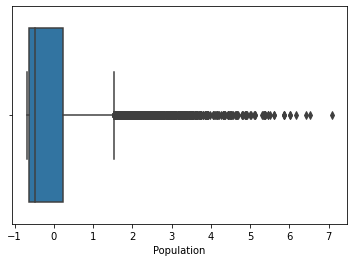

count    10000.00
mean        -0.00
std          1.00
min         -0.68
25%         -0.62
50%         -0.47
75%          0.24
max          7.07
Name: Population, dtype: float64


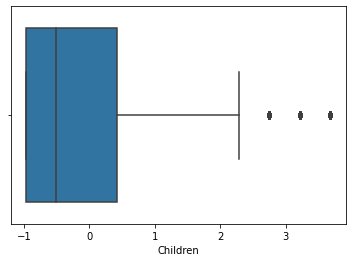

count    10000.00
mean         0.00
std          1.00
min         -0.97
25%         -0.97
50%         -0.51
75%          0.42
max          3.68
Name: Children, dtype: float64


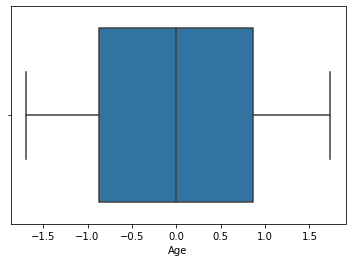

count    10000.00
mean        -0.00
std          1.00
min         -1.69
25%         -0.87
50%         -0.00
75%          0.87
max          1.74
Name: Age, dtype: float64


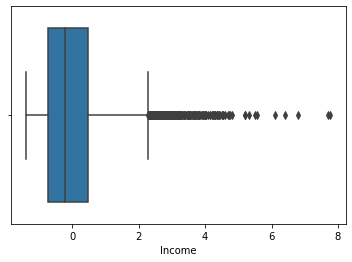

count    10000.00
mean         0.00
std          1.00
min         -1.40
25%         -0.73
50%         -0.24
75%          0.48
max          7.77
Name: Income, dtype: float64


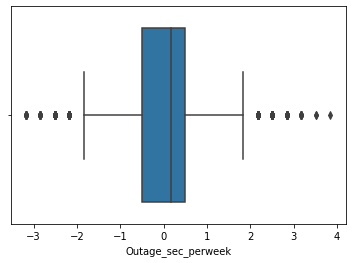

count    10000.00
mean         0.00
std          1.00
min         -3.18
25%         -0.50
50%          0.17
75%          0.50
max          3.84
Name: Outage_sec_perweek, dtype: float64


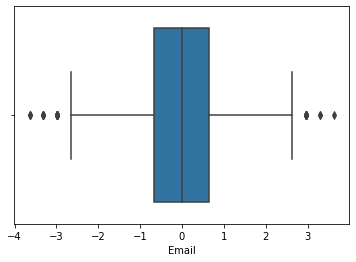

count    10000.00
mean        -0.00
std          1.00
min         -3.64
25%         -0.67
50%         -0.01
75%          0.66
max          3.63
Name: Email, dtype: float64


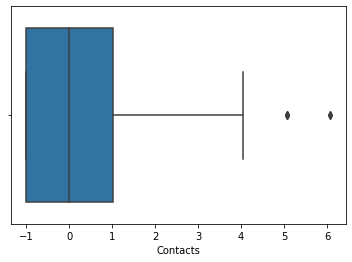

count    10000.00
mean         0.00
std          1.00
min         -1.01
25%         -1.01
50%          0.01
75%          1.02
max          6.08
Name: Contacts, dtype: float64


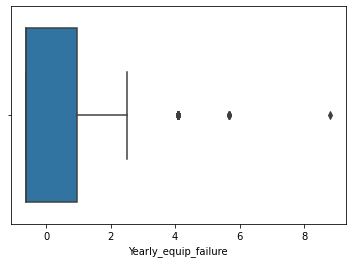

count    10000.00
mean        -0.00
std          1.00
min         -0.63
25%         -0.63
50%         -0.63
75%          0.95
max          8.81
Name: Yearly_equip_failure, dtype: float64


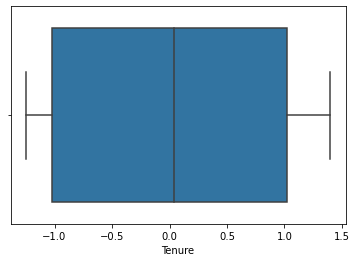

count    10000.00
mean         0.00
std          1.00
min         -1.25
25%         -1.02
50%          0.04
75%          1.02
max          1.40
Name: Tenure, dtype: float64


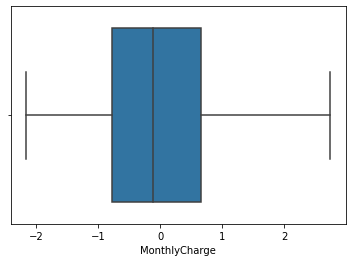

count    10000.00
mean         0.00
std          1.00
min         -2.16
25%         -0.77
50%         -0.12
75%          0.66
max          2.74
Name: MonthlyCharge, dtype: float64


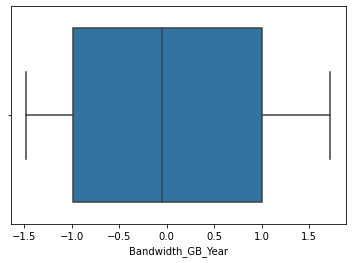

count    10000.00
mean         0.00
std          1.00
min         -1.48
25%         -0.99
50%         -0.05
75%          1.00
max          1.72
Name: Bandwidth_GB_Year, dtype: float64


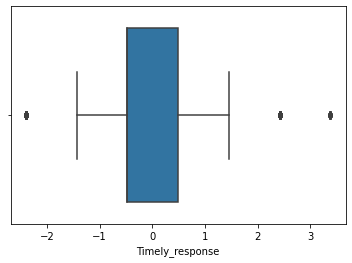

count    10000.00
mean        -0.00
std          1.00
min         -2.40
25%         -0.47
50%         -0.47
75%          0.49
max          3.38
Name: Timely_response, dtype: float64


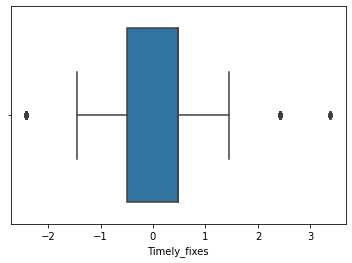

count    10000.00
mean         0.00
std          1.00
min         -2.42
25%         -0.49
50%          0.48
75%          0.48
max          3.38
Name: Timely_fixes, dtype: float64


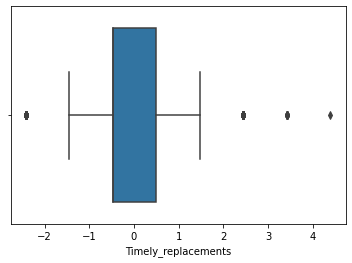

count    10000.00
mean        -0.00
std          1.00
min         -2.42
25%         -0.47
50%         -0.47
75%          0.50
max          4.39
Name: Timely_replacements, dtype: float64


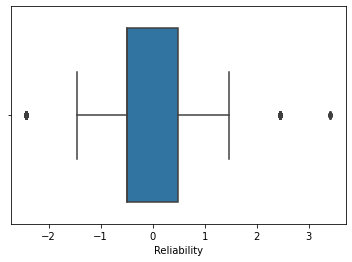

count    10000.00
mean        -0.00
std          1.00
min         -2.43
25%         -0.48
50%         -0.48
75%          0.49
max          3.41
Name: Reliability, dtype: float64


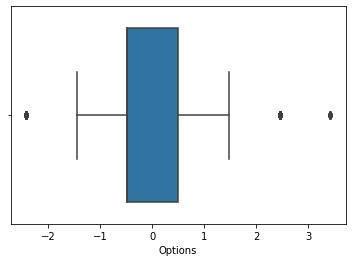

count    10000.00
mean         0.00
std          1.00
min         -2.43
25%         -0.48
50%         -0.48
75%          0.49
max          3.42
Name: Options, dtype: float64


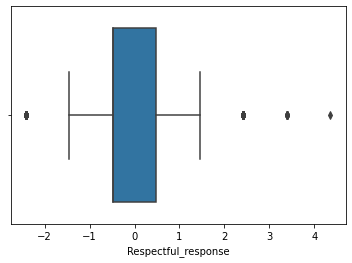

count    10000.00
mean         0.00
std          1.00
min         -2.42
25%         -0.48
50%         -0.48
75%          0.49
max          4.36
Name: Respectful_response, dtype: float64


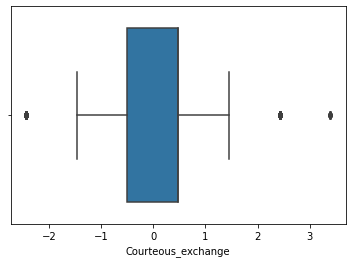

count    10000.00
mean        -0.00
std          1.00
min         -2.44
25%         -0.50
50%          0.48
75%          0.48
max          3.39
Name: Courteous_exchange, dtype: float64


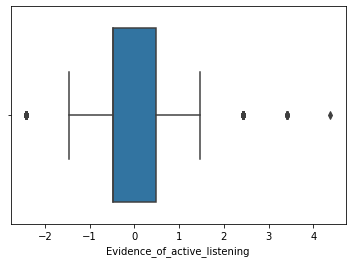

count    10000.00
mean        -0.00
std          1.00
min         -2.43
25%         -0.48
50%         -0.48
75%          0.49
max          4.38
Name: Evidence_of_active_listening, dtype: float64


In [19]:
for column in num:
    plt.figure()    
    sns.boxplot(data = file, x = column)
    plt.show()
    print(file[column].describe().round(2).T)
    ;

Visualize categories using bar charts

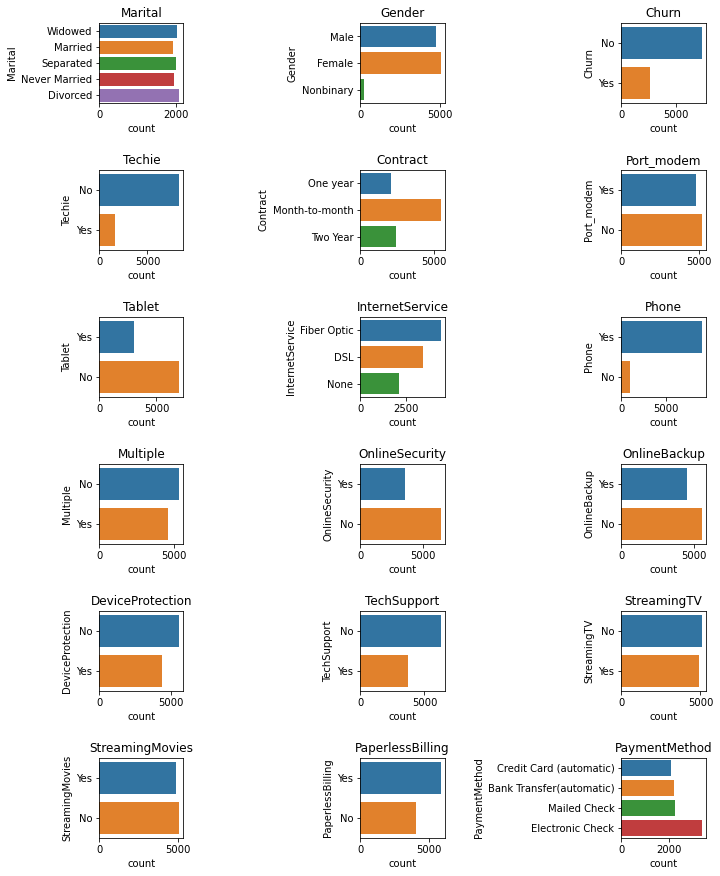

In [20]:
# count plot of categorical data
fig = plt.figure(figsize=(10, 20))

for i, col in enumerate(obj):
    plt.subplot(10, 3, i+1)
    ax = sns.countplot(y=col, data=file)
    plt.title(col)
    fig.tight_layout(h_pad=2, w_pad=2)

plt.savefig('countplot_cat_data.png', facecolor='w')

review correlation properties of numeric values in data set

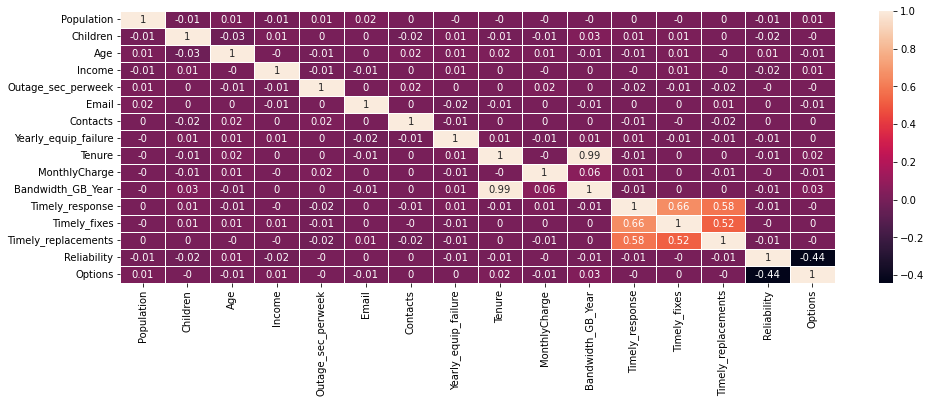

In [21]:
df_num= pd.DataFrame(file, columns= ['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Timely_response', 'Timely_fixes',
       'Timely_replacements', 'Reliability', 'Options'])

corrMatrix = df_num.corr().round(2)
plt.figure(figsize = (16,5))
sns.heatmap(corrMatrix, linewidths=.5, annot=True)
plt.show()

Review heatmap of categorical objects

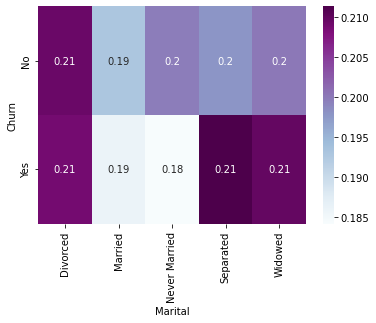

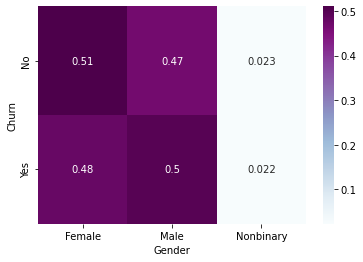

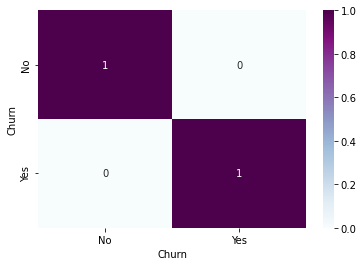

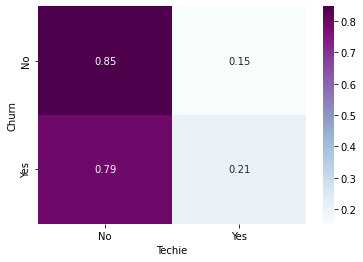

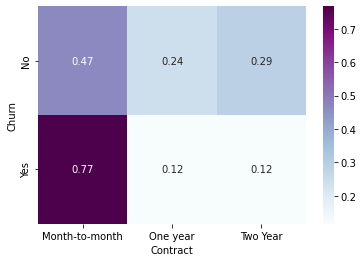

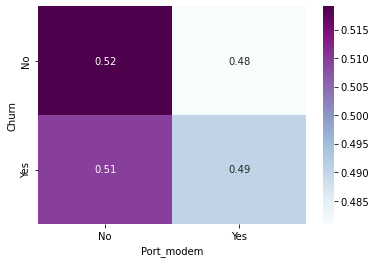

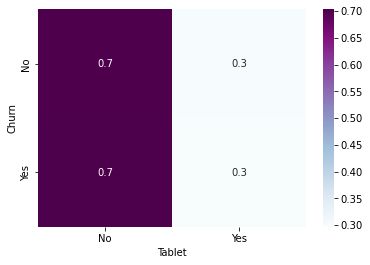

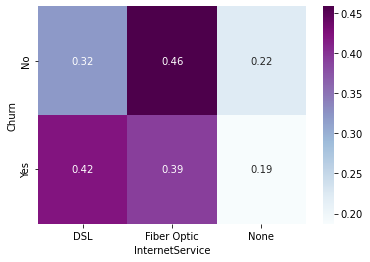

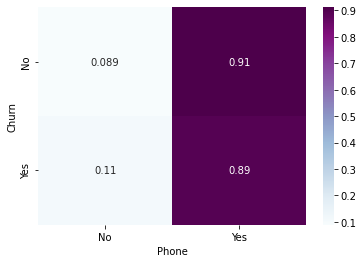

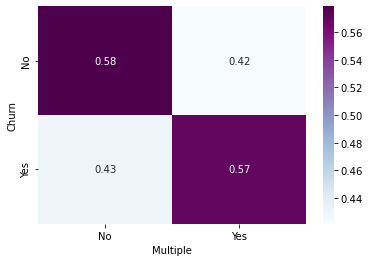

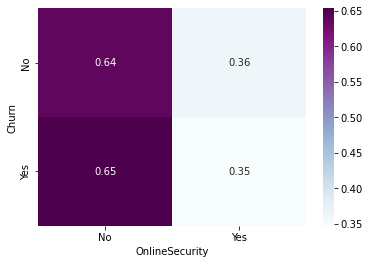

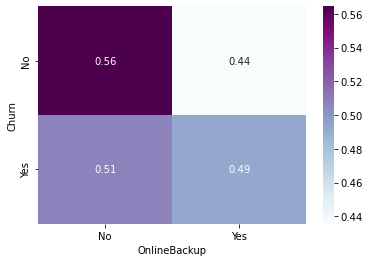

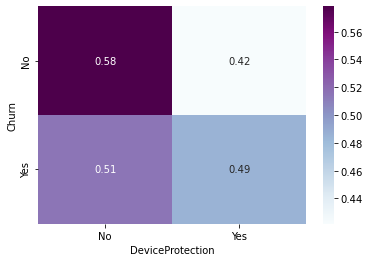

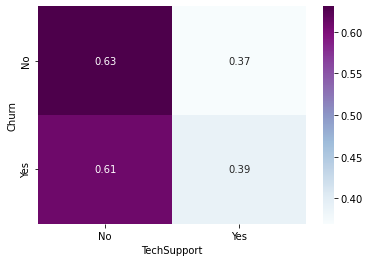

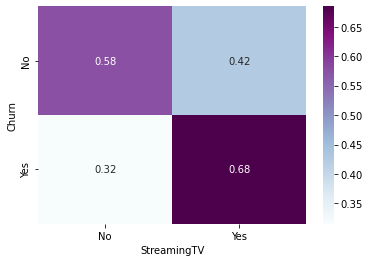

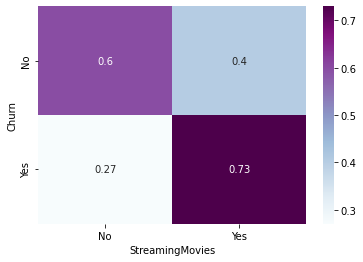

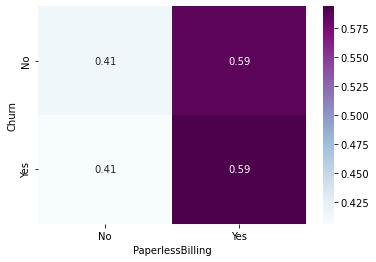

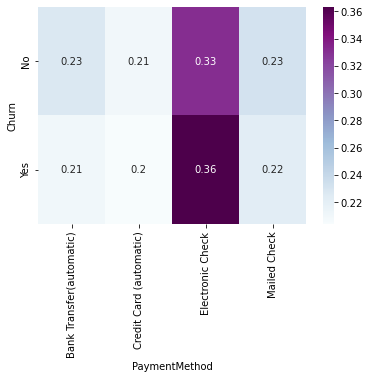

In [22]:
for column in obj:
    cont_pct = pd.crosstab(file['Churn'], file[column], normalize = 'index')
    plt.figure()    
    sns.heatmap(cont_pct, annot = True, cmap ="BuPu" );
    
# reference https://python-bloggers.com/2020/09/how-to-run-chi-square-test-in-python/

Evaluate assumption that Bandwidth and Tenure have a high correlative fit

## Univariate
perform univariate analysis over dataset

In [23]:
def unistats(file):
    #create headers
    output_df = pd.DataFrame(columns =['Count','Missing', 'Unique', 'Dtype', 'Numeric', 'Mode', 'Mean', 'Min',
                                       '25%', 'Median', '75%','Max', 'Std', 'Skew', 'Kurt'])
    
    for col in file:
        if pd.api.types.is_numeric_dtype(file[col]):
            output_df.loc[col] = [file[col].count(),file[col].isnull,file[col].nunique(),file[col].dtype, pd.api.types.is_numeric_dtype(file[col]),
                                 file[col].mode().values[0],file[col].mean(),file[col].min(),file[col].quantile(0.25),file[col].median(),
                                 file[col].quantile(0.75),file[col].max(),file[col].std(),file[col].skew(),file[col].kurt()]
        else:
            output_df.loc[col] = [file[col].count(),file[col].isnull,file[col].nunique(),file[col].dtype, pd.api.types.is_numeric_dtype(file[col]),
                                  '','','','','','','','','','']
    return output_df.sort_values(by=['Numeric','Skew','Unique'], ascending = False)
unistats(file)

Count  \
Population                    10000   
Yearly_equip_failure          10000   
Income                        10000   
Children                      10000   
Contacts                      10000   
MonthlyCharge                 10000   
Respectful_response           10000   
Tenure                        10000   
Bandwidth_GB_Year             10000   
Evidence_of_active_listening  10000   
Timely_replacements           10000   
Timely_response               10000   
Options                       10000   
Timely_fixes                  10000   
Courteous_exchange            10000   
Age                           10000   
Reliability                   10000   
Outage_sec_perweek            10000   
Email                         10000   
Marital                       10000   
PaymentMethod                 10000   
Gender                        10000   
Contract                      10000   
InternetService               10000   
Churn                         10000   
Techie                        10000   
Port_modem                    10000   
Tablet                        10000   
Phone                         10000   
Multiple                      10000   
OnlineSecurity                10000   
OnlineBackup                  10000   
DeviceProtection              10000   
TechSupport                   10000   
StreamingTV                   10000   
StreamingMovies               10000   
PaperlessBilling              10000   

                                                                        Missing  \
Population                    <bound method Series.isnull of 0      -0.67337...   
Yearly_equip_failure          <bound method Series.isnull of 0       0.94661...   
Income                        <bound method Series.isnull of 0      -0.39877...   
Children                      <bound method Series.isnull of 0      -0.97228...   
Contacts                      <bound method Series.isnull of 0      -1.00580...   
MonthlyCharge                 <bound method Series.isnull of 0      -0.00029...   
Respectful_response           <bound method Series.isnull of 0       0.48636...   
Tenure                        <bound method Series.isnull of 0      -1.05988...   
Bandwidth_GB_Year             <bound method Series.isnull of 0      -1.13844...   
Evidence_of_active_listening  <bound method Series.isnull of 0       0.49035...   
Timely_replacements           <bound method Series.isnull of 0       1.47182...   
Timely_response               <bound method Series.isnull of 0       1.45423...   
Options                       <bound method Series.isnull of 0       0.49481...   
Timely_fixes                  <bound method Series.isnull of 0       1.44485...   
Courteous_exchange            <bound method Series.isnull of 0      -0.49538...   
Age                           <bound method Series.isnull of 0       0.72088...   
Reliability                   <bound method Series.isnull of 0      -0.48498...   
Outage_sec_perweek            <bound method Series.isnull of 0      -0.83609...   
Email                         <bound method Series.isnull of 0      -0.66624...   
Marital                       <bound method Series.isnull of 0             W...   
PaymentMethod                 <bound method Series.isnull of 0        Credit...   
Gender                        <bound method Series.isnull of 0         Male\...   
Contract                      <bound method Series.isnull of 0             O...   
InternetService               <bound method Series.isnull of 0       Fiber O...   
Churn                         <bound method Series.isnull of 0        No\n1 ...   
Techie                        <bound method Series.isnull of 0        No\n1 ...   
Port_modem                    <bound method Series.isnull of 0       Yes\n1 ...   
Tablet                        <bound method Series.isnull of 0       Yes\n1 ...   
Phone                         <bound method Series.isnull of 0       Yes\n1 ...   
Multiple                      <bound method Series.isnull

## Bivariate
Review Bivariate analysis over data set.

In [24]:
def bivstats(file, label):
    from scipy import stats
    import pandas as pd
    import numpy as np
    
    #Create Empty dataframe to store output
    output_df = pd.DataFrame(columns=['r', 'F', 'X2', 'p-value'])
    
    for col in file:
        if not col == label:
            if file[col].isnull().sum()==0:
                if pd.api.types.is_numeric_dtype(file[col]): # only calculate r, p-value for the numeric 
                    r, p = stats.pearsonr(file[label], file[col])
                    output_df.loc[col] = [round(r,3), np.nan, np.nan, round(p,6)]
            else:
                output_df.loc[col] = [np.nan, np.nan, np.nan, 'nulls']
    return output_df.reindex(output_df.r.abs().sort_values(ascending = False).index)
bivstats(file, 'MonthlyCharge')

r   F  X2   p-value
Bandwidth_GB_Year             0.060 NaN NaN  0.000000
Outage_sec_perweek            0.019 NaN NaN  0.061799
Age                           0.011 NaN NaN  0.280797
Children                     -0.010 NaN NaN  0.329321
Timely_response               0.010 NaN NaN  0.325687
Timely_replacements          -0.008 NaN NaN  0.402746
Courteous_exchange           -0.007 NaN NaN  0.514030
Yearly_equip_failure         -0.007 NaN NaN  0.472975
Options                      -0.006 NaN NaN  0.580056
Population                   -0.005 NaN NaN  0.626164
Timely_fixes                  0.004 NaN NaN  0.725322
Contacts                      0.004 NaN NaN  0.667249
Tenure                       -0.003 NaN NaN  0.731965
Respectful_response           0.003 NaN NaN  0.763318
Income                       -0.003 NaN NaN  0.771677
Email                         0.002 NaN NaN  0.837776
Evidence_of_active_listening  0.002 NaN NaN  0.828734
Reliability                  -0.000 NaN NaN  0.967713

In [25]:
def anova(file, feature, label):
    import pandas as pd
    import numpy as np
    from scipy import stats
    # use the unique() to generate a list of unique values in catigorical column
    groups = file[feature].unique()
    # print(groups)
    file_grouped = file.groupby(feature)
    #print(df_grouped)
    group_labels = []
    for g in groups:
        g_list = file_grouped.get_group(g)
        #print(g_list)
        group_labels.append(g_list[label])
    #print(group_labels)
    return stats.f_oneway(*group_labels)

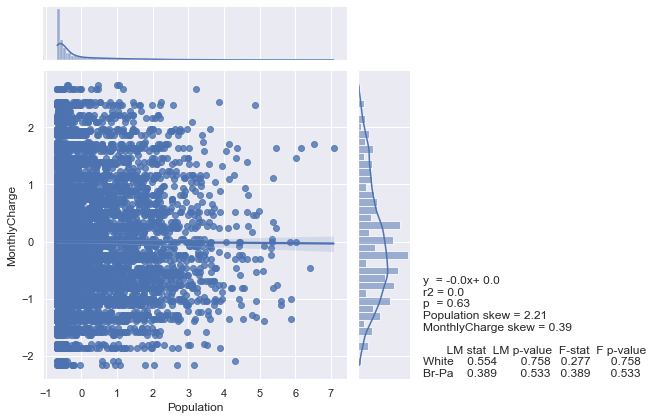

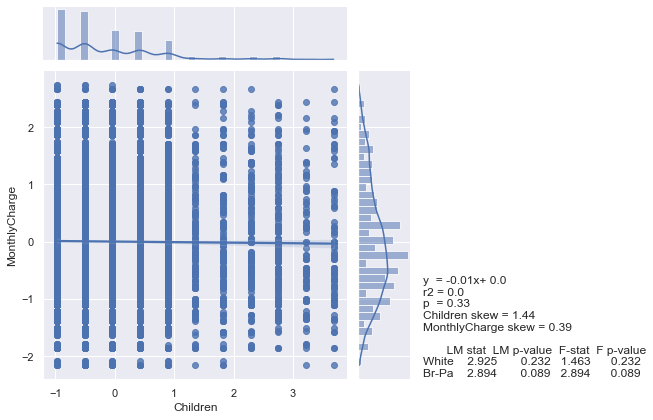

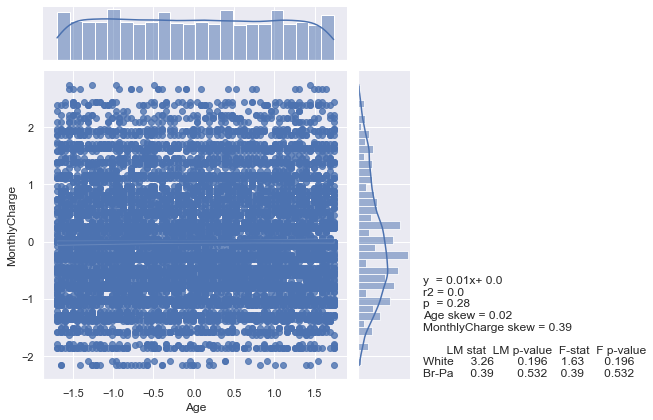

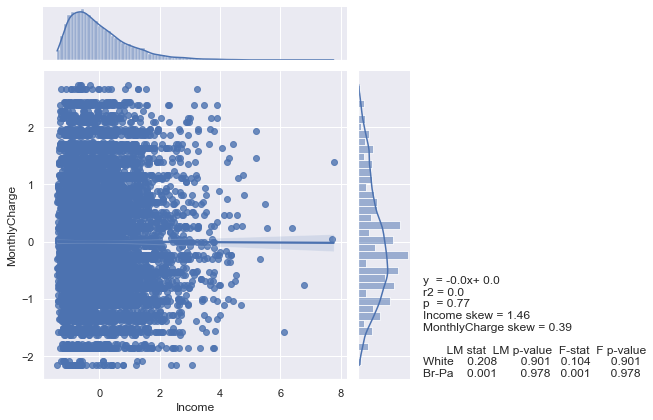

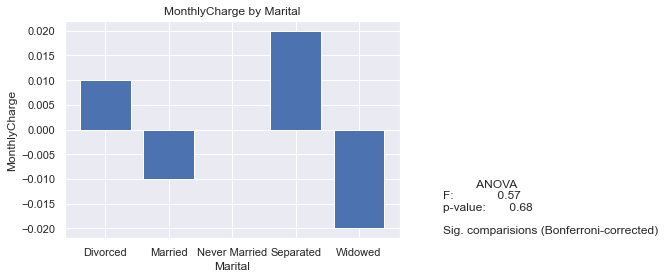

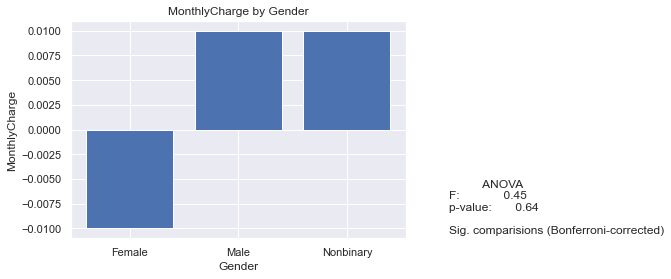

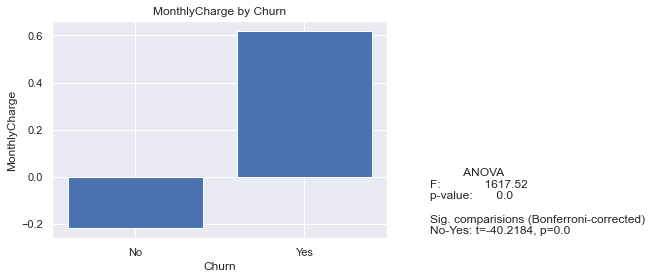

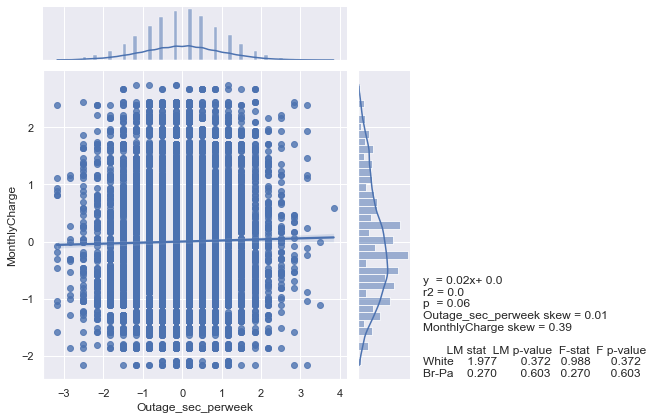

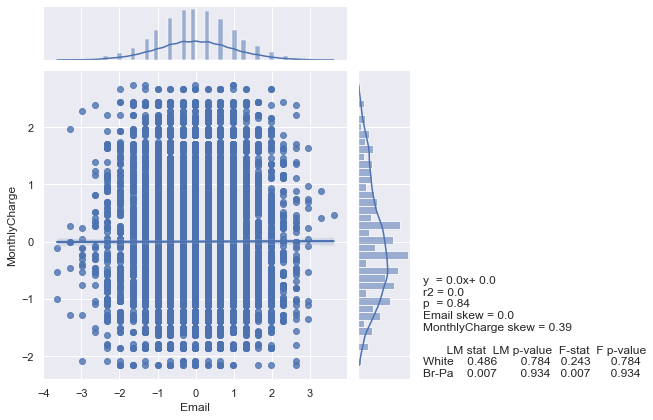

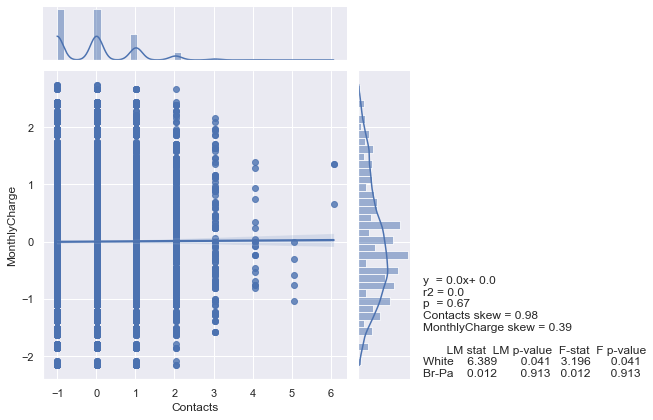

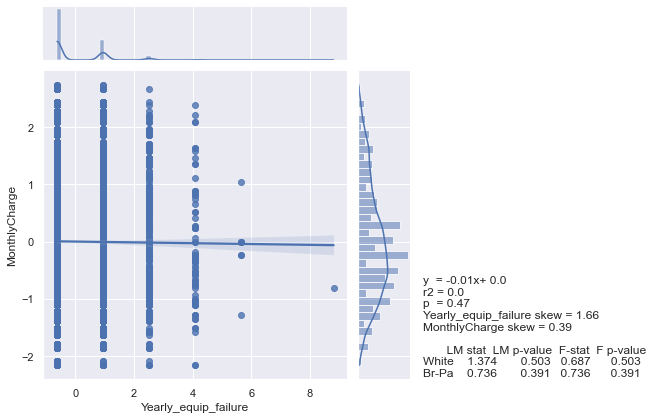

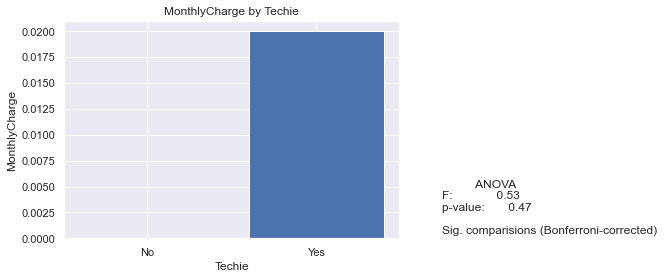

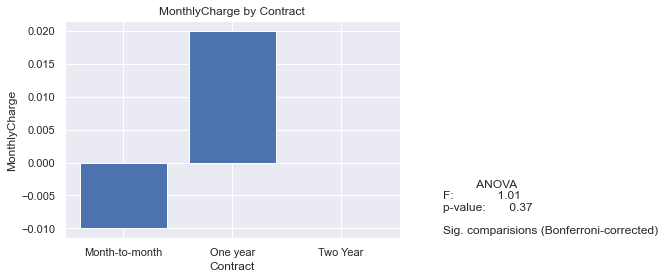

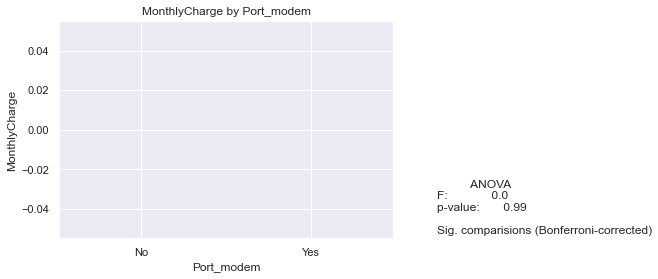

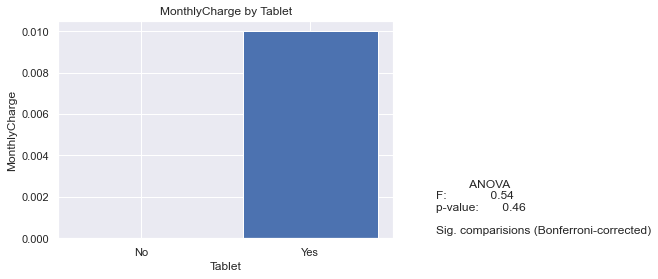

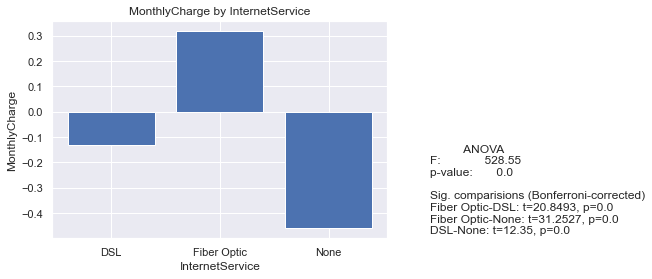

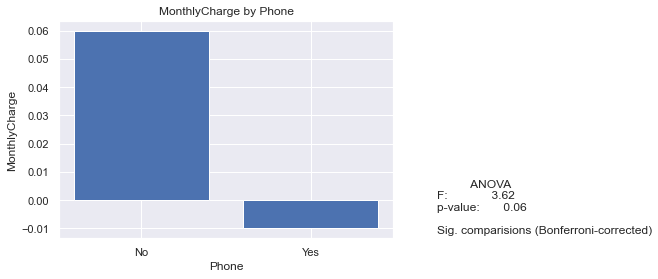

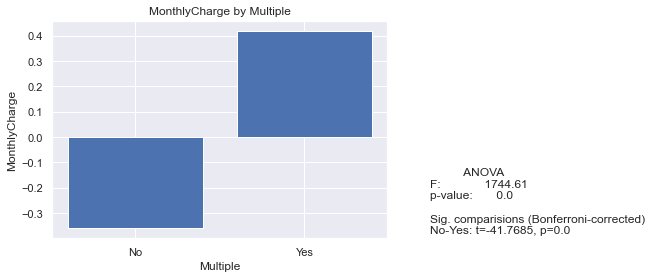

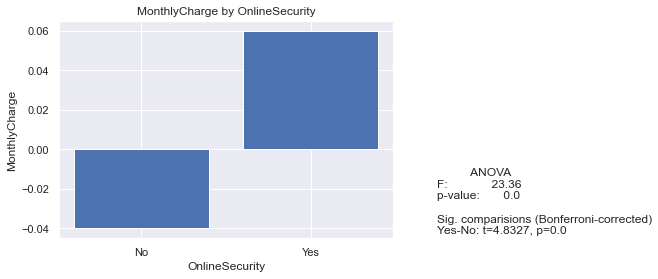

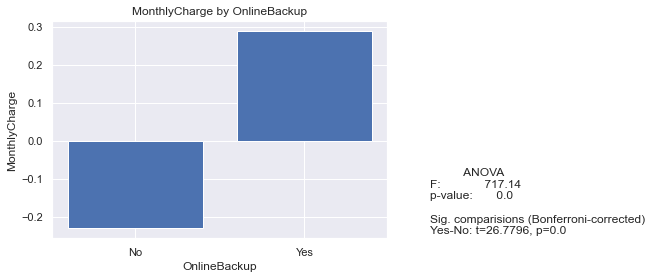

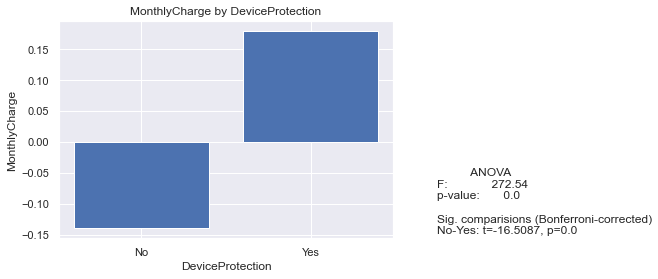

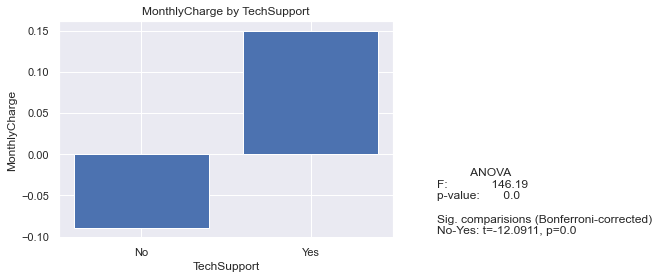

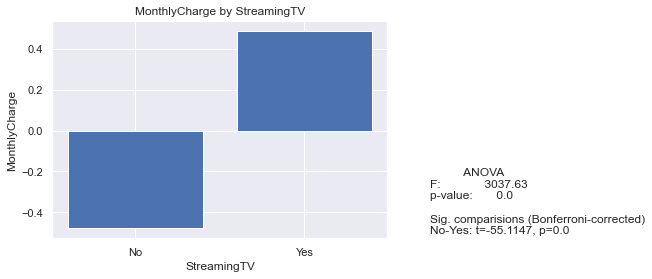

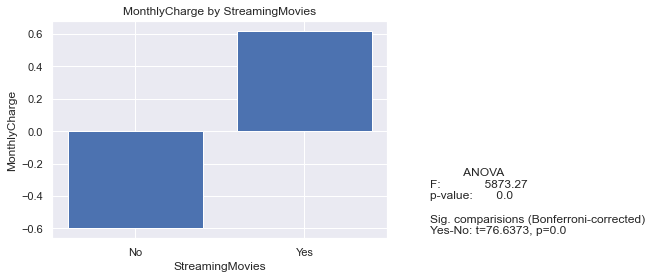

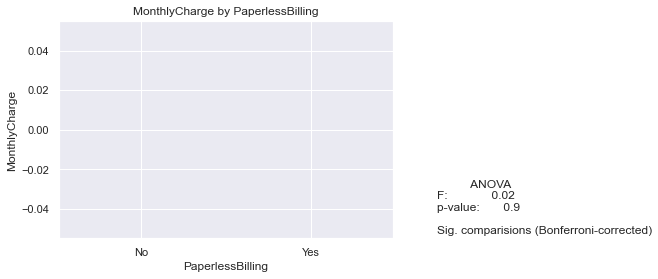

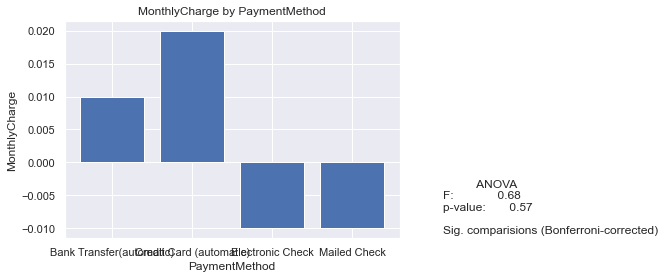

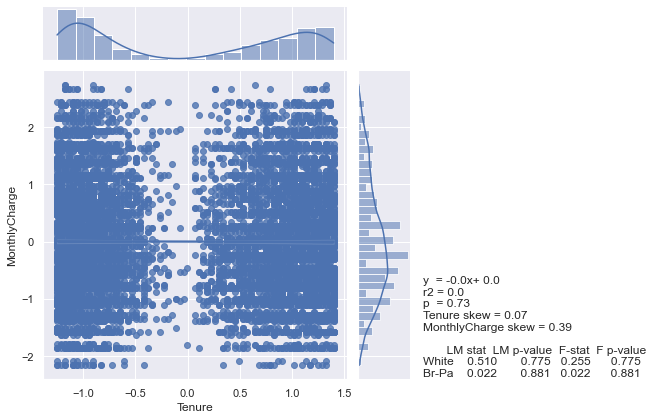

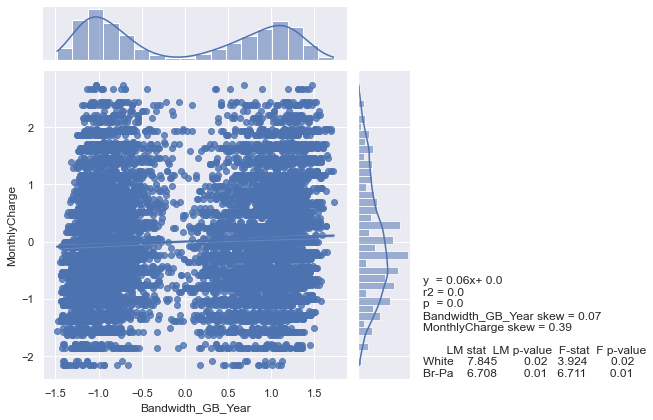

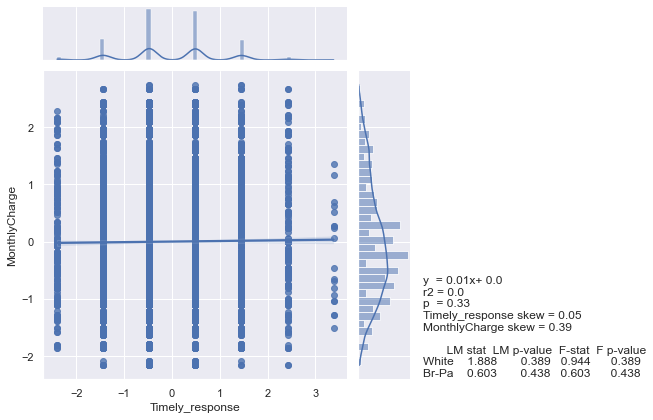

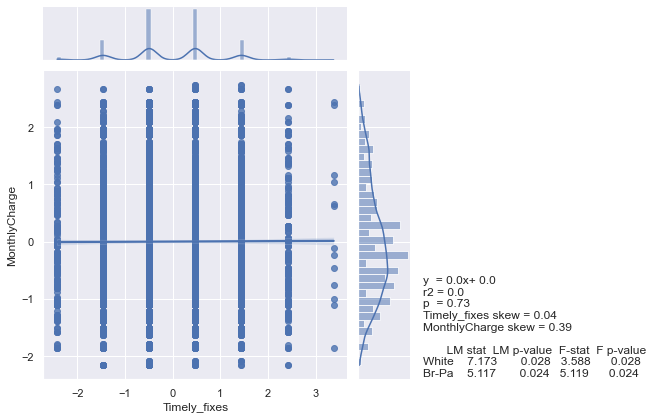

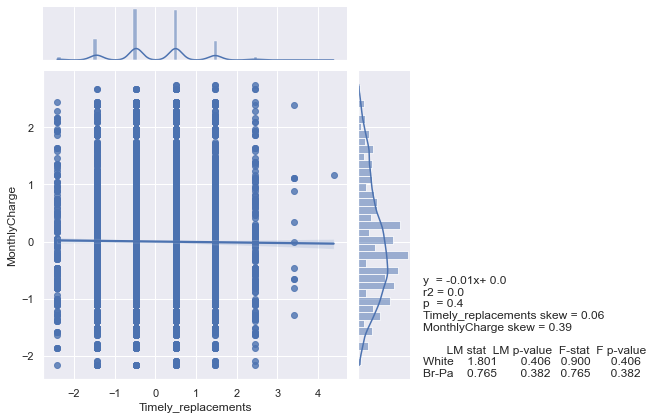

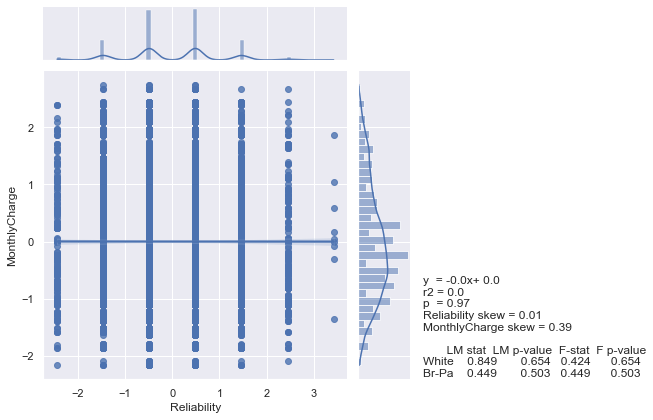

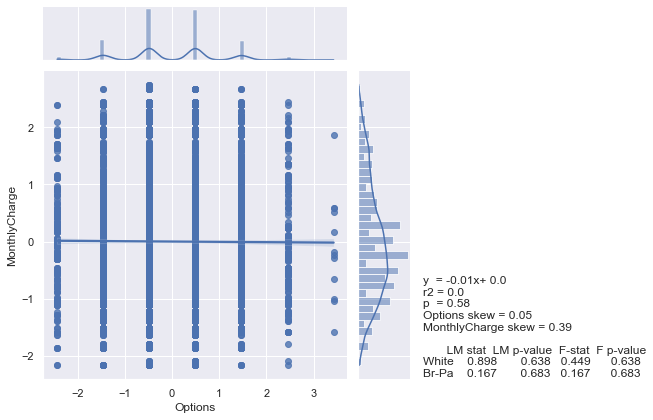

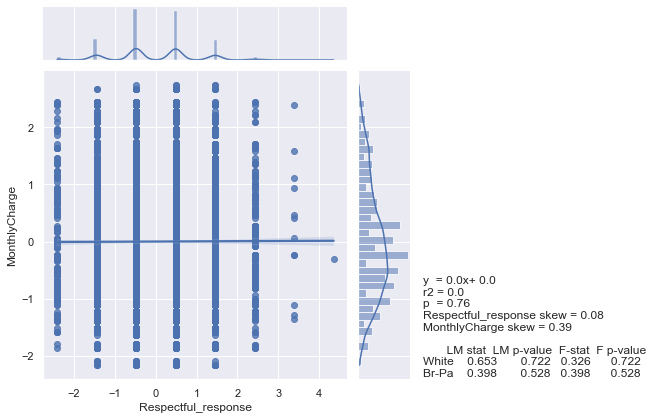

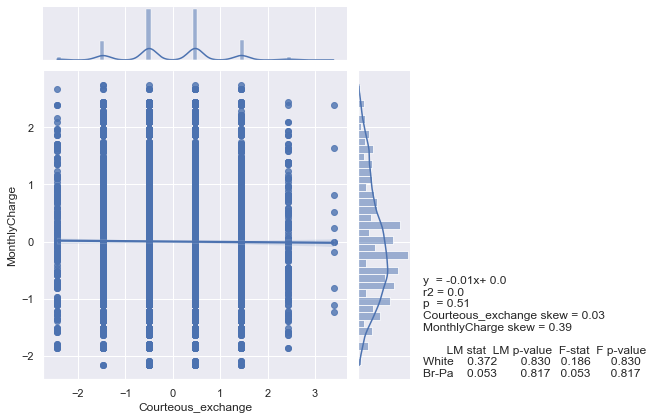

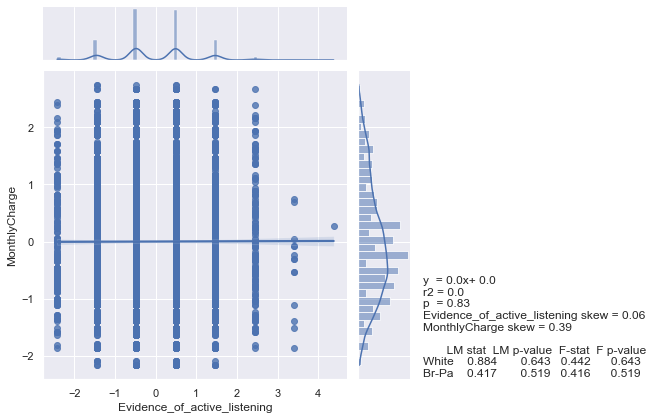

Stat r(+/1)  Effect Size   p-value
Bandwidth_GB_Year               r    1.0        0.060  0.000000
Outage_sec_perweek              r    1.0        0.019  0.061799
Age                             r    1.0        0.011  0.280797
Children                        r   -1.0        0.010  0.329321
Timely_response                 r    1.0        0.010  0.325687
Timely_replacements             r   -1.0        0.008  0.402746
Yearly_equip_failure            r   -1.0        0.007  0.472975
Courteous_exchange              r   -1.0        0.007  0.514030
Options                         r   -1.0        0.006  0.580056
Population                      r   -1.0        0.005  0.626164
Contacts                        r    1.0        0.004  0.667249
Timely_fixes                    r    1.0        0.004  0.725322
Income                          r   -1.0        0.003  0.771677
Tenure                          r   -1.0        0.003  0.731965
Respectful_response             r    1.0        0.003  0.763318
Email                           r    1.0        0.002  0.837776
Evidence_of_active_listening    r    1.0        0.002  0.828734
Reliability                     r   -1.0        0.000  0.967713
StreamingMovies                 F            5873.273  0.000000
StreamingTV                     F            3037.628  0.000000
Multiple                        F            1744.607  0.000000
Churn                           F            1617.522  0.000000
OnlineBackup                    F             717.145  0.000000
InternetService                 F             528.548  0.000000
DeviceProtection                F             272.537  0.000000
TechSupport                     F             146.195  0.000000
OnlineSecurity                  F              23.355  0.000001
Phone                           F               3.623  0.057006
Contract                        F               1.007  0.365519
PaymentMethod                   F               0.675  0.566961
Marital                         F               0.570  0.684242
Tablet                          F               0.538  0.463427
Techie                          F               0.529  0.467184
Gender                          F               0.446  0.640308
PaperlessBilling                F               0.016  0.898670
Port_modem                      F               0.000  0.992534

In [26]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
def heteroscedasticity(df, feature, label ):
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    from statsmodels.stats.diagnostic import het_breuschpagan
    from statsmodels.stats.diagnostic import het_white
    # Fit the OLS model : ols(formula = '[label]~[feature], data=df').fit()
    model = ols(formula =(label + '~' + feature), data= file).fit()
    
    white_test = het_white(model.resid, model.model.exog)
    bp_test = het_breuschpagan(model.resid, model.model.exog)
    
    output_df = pd.DataFrame(columns = ['LM stat', 'LM p-value', 'F-stat', 'F p-value'])
    output_df.loc['White'] = white_test
    output_df.loc['Br-Pa']= bp_test
    return output_df.round(3)


def scatter(feature,label):
    from scipy import stats
    # Create Legend
    m, b, r, p, err = stats.linregress(feature, label)
    textstr = 'y  = ' + str(round(m,2)) +'x+ ' + str(round(b,2)) + '\n'
    textstr += 'r2 = ' + str(round(r**2,2)) +'\n'
    textstr += 'p  = ' + str(round(p,2)) +'\n'
    textstr += str(feature.name) + ' skew = ' + str(round(feature.skew(),2)) + '\n'
    textstr += str(label.name) + ' skew = ' + str(round(label.skew(),2)) + '\n'+'\n'
    textstr += str(heteroscedasticity(pd.DataFrame(label).join(pd.DataFrame(feature)), feature.name, label.name))
    
    sns.set(color_codes=True)
    ax = sns.jointplot(feature, label, kind = 'reg')
    ax.fig.text(1, 0.114, textstr, fontsize=12, transform=plt.gcf().transFigure)
    plt.show()
#scatter(df.Tenure, df.Bandwidth_GB_Year)

#def bar_chart
def bar_chart(df, feature, label):
    import pandas as pd
    from scipy import stats
    from matplotlib import pyplot as plt
    
    means = df.groupby(feature).mean()[label].round(2)
    
    plt.bar(df.groupby(feature).groups.keys(),means)
    plt.title(label + " by " + feature)
    plt.xlabel(feature)
    plt.ylabel(label)
    
    groups = df[feature].unique()
    df_grouped = df.groupby(feature)
    group_labels = []
    for g in groups:
        g_list = df_grouped.get_group(g)
        group_labels.append(g_list[label])
    
    #ANOVA
    oneway = stats.f_oneway(*group_labels)
    
    #t-test
    unique_groups = df[feature].unique()
    ttests = []
    
    for i, group in enumerate(unique_groups):
        for i2, group_2 in enumerate(unique_groups):
            if i2 >i:
                type_1 = df[df[feature] == group]
                type_2 = df[df[feature] == group_2]
                # There must be more than 1 case per gorup to perform a t-test
                if len(type_1[label]) < 2 or len(type_2[label]) <2:
                    print("''" + group + "''", str(len(type_1)) + "; '" + group_2 + "' n -'" +str(len(type_2)) + "; no t-test performed")
                else:
                    t, p = stats.ttest_ind(type_1[label], type_2[label])
                    ttests.append([group, group_2, t.round(4), p.round(4)])
                
    p_threshold = 0.05 / len(ttests)  # bonferroni- corrected p- value determined
    
    # add all descriptive statistics to the diagram
    textstr = '          ANOVA'  + '\n'
    textstr += 'F:             ' + str(oneway[0].round(2)) + '\n'
    textstr += 'p-value:       ' + str(oneway[1].round(2)) + '\n\n'
    textstr += 'Sig. comparisions (Bonferroni-corrected)' +  '\n'
    
    for ttest in ttests:
        if ttest[3] <= p_threshold:
            textstr += ttest[0] + '-' + ttest[1] + ": t=" + str(ttest[2]) + ", p=" + str(ttest[3]) + '\n'
    plt.text(1, 0.1, textstr, fontsize = 12, transform=plt.gcf().transFigure)
    plt.show()
#bar_chart



def bivstats(file, label):
    from scipy import stats
    import pandas as pd
    import numpy as np
    
    #Create Empty dataframe to store output
    output_df = pd.DataFrame(columns=['Stat','r(+/1)', 'Effect Size','p-value'])
    
    for col in file:
        if not col == label:
            if file[col].isnull().sum()==0:
                if pd.api.types.is_numeric_dtype(file[col]): # only calculate r, p-value for the numeric 
                    r, p = stats.pearsonr(file[label], file[col])
                    output_df.loc[col] = ['r', np.sign(r), abs(round(r,3)), round(p,6)]
                    scatter(file[col], file[label])
                else:
                    F, p = anova(file[[col, label]], col, label)
                    output_df.loc[col] =  ['F', '', round(F,3), round(p,6)]
                    bar_chart(file, col, label)
            else:
                output_df.loc[col] = [np.nan, np.nan, np.nan, np.nan]
                
    return output_df.sort_values(by=['Stat','Effect Size'], ascending = [False, False])
    plt.show()
bivstats(file, 'MonthlyCharge')

In [27]:
def bivstats(file, label):
    from scipy import stats
    import pandas as pd
    import numpy as np
    
    global output_df
    #Create Empty dataframe to store output
    output_df = pd.DataFrame(columns=['Stat','r(+/1)', 'Effect Size','p-value'])
    
    for col in file:
        if not col == label:
            if file[col].isnull().sum()==0:
                if pd.api.types.is_numeric_dtype(file[col]): # only calculate r, p-value for the numeric 
                    r, p = stats.pearsonr(file[label], file[col])
                    output_df.loc[col] = ['r', np.sign(r), abs(round(r,3)>.4), round(6)>.5]
                else:
                    F, p = anova(file[[col, label]], col, label)
                    output_df.loc[col] =  ['F', '', round(F,3)>.4, round(p,6)>.5]
                    
                    
            else:
                output_df.loc[col] = [np.nan, np.nan, np.nan, np.nan]
                
    return output_df.sort_values(by=['p-value','Effect Size'], ascending = [False, False])
bivstats(file, 'MonthlyCharge')

Stat r(+/1) Effect Size p-value
Marital                         F               True    True
Gender                          F               True    True
PaymentMethod                   F               True    True
Population                      r   -1.0       False    True
Children                        r   -1.0       False    True
Age                             r    1.0       False    True
Income                          r   -1.0       False    True
Outage_sec_perweek              r    1.0       False    True
Email                           r    1.0       False    True
Contacts                        r    1.0       False    True
Yearly_equip_failure            r   -1.0       False    True
Port_modem                      F              False    True
PaperlessBilling                F              False    True
Tenure                          r   -1.0       False    True
Bandwidth_GB_Year               r    1.0       False    True
Timely_response                 r    1.0       False    True
Timely_fixes                    r    1.0       False    True
Timely_replacements             r   -1.0       False    True
Reliability                     r   -1.0       False    True
Options                         r   -1.0       False    True
Respectful_response             r    1.0       False    True
Courteous_exchange              r   -1.0       False    True
Evidence_of_active_listening    r    1.0       False    True
Churn                           F               True   False
Techie                          F               True   False
Contract                        F               True   False
Tablet                          F               True   False
InternetService                 F               True   False
Phone                           F               True   False
Multiple                        F               True   False
OnlineSecurity                  F               True   False
OnlineBackup                    F               True   False
DeviceProtection                F               True   False
TechSupport                     F               True   False
StreamingTV                     F               True   False
StreamingMovies                 F               True   False

# C5 PREPARED DATA SET
copy of the fully prepared data set.

In [28]:
file.to_csv("C:\\Users\\msmorris\\Desktop\\pred.csv")

## D1 INITIAL MODEL
Initial model usig numeric data types against MonthlyCharge

In [29]:
# initial model
y = file['MonthlyCharge']
x = pred_df.select_dtypes(include="number")
x = (x - x.min()) / (x.max() - x.min()) 
xcon = sm.add_constant(x)
model_1 = sm.OLS(y, xcon).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyCharge   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 1.056e+04
Date:                Sun, 19 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:50:08   Log-Likelihood:                 5135.2
No. Observations:               10000   AIC:                        -1.018e+04
Df Residuals:                    9955   BIC:                            -9856.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9560      0.024   -166.223      0.000      -4.003      -3.909
Population                                0.0076      0.011      0.678      0.498      -0.014       0.030
Children                                 -1.2414      0.014    -87.423      0.000      -1.269      -1.214
Age                                       0.9491      0.011     88.568      0.000       0.928       0.970
Income                                   -0.0020      0.013     -0.150      0.881      -0.028       0.024
Outage_sec_perweek                        0.0086      0.010      0.841      0.401      -0.011       0.029
Email                                    -0.0064      0.011     -0.608      0.543      -0.027       0.014
Contacts                                 -0.0056      0.010     -0.547      0.584      -0.026       0.015
Yearly_equip_failure                      0.0069      0.014      0.502      0.616      -0.020       0.034
Tenure                                  -23.1875      0.233    -99.378      0.000     -23.645     -22.730
Bandwidth_GB_Year                        28.3426      0.285     99.591      0.000      27.785      28.900
Timely_response                          -0.0043      0.012     -0.345      0.730      -0.029       0.020
Timely_fixes                              0.0179      0.012      1.531      0.126      -0.005       0.041
Timely_replacements                       0.0020      0.013      0.158      0.875      -0.023       0.027
Reliability                              -0.0022      0.010     -0.225      0.822      -0.021       0.017
Options                                  -0.0022      0.010     -0.220      0.826      -0.022       0.017
Respectful_response                      -0.0088      0.012     -0.732      0.464      -0.032       0.015
Courteous_exchange                       -0.0031      0.010     -0.318      0.751      -0.022       0.016
Evidence_of_active_listening             -0.0227      0.011     -2.102      0.036      -0.044      -0.002
Marital_Married                           0.0020      0.005      0.437      0.662      -0.007       0.011
Marital_Never Married                     0.0019      0.005      0.425      0.671      -0.007       0.011
Marital_Separated                        -0.0002      0.005     -0.035      0.972      -0.009       0.009
Marital_Widowed                           0.0027      0.005      0.593      0.553      -0.006       0.012
Gender_Male                              -0.2658      0.004    -67.600      0.000      -0.274      -0.258
Gender_Nonbinary                          0.0888      0.010      9.026      0.000       0.070       0.108
Churn_Yes                                 0.0447      0.005      9.731      0.000       0.036       0.054
Techie_Ye

In [30]:
model_1.params

const                                    -3.956021
Population                                0.007633
Children                                 -1.241450
Age                                       0.949084
Income                                   -0.002000
Outage_sec_perweek                        0.008584
Email                                    -0.006435
Contacts                                 -0.005633
Yearly_equip_failure                      0.006891
Tenure                                  -23.187482
Bandwidth_GB_Year                        28.342635
Timely_response                          -0.004318
Timely_fixes                              0.017922
Timely_replacements                       0.001974
Reliability                              -0.002165
Options                                  -0.002195
Respectful_response                      -0.008765
Courteous_exchange                       -0.003084
Evidence_of_active_listening             -0.022663
Marital_Married                

Key for evaluating OLS regression results.

#### BASIC INFORMATION ABOUT THE MODEL
|Element|Description|
|-------|-----------|
|Dep. Variable|	Which variable is the response in the model|
|Model	|What model you are using in the fit|
|Method	|How the parameters of the model were calculated|
|No. Observations|	The number of observations (examples)|
|DF Residuals|	Degrees of freedom of the residuals. Number of observations – number of parameters|
|DF Model	|Number of parameters in the model (not including the constant term if present)|


#### Goodness of the fit

|Element|	Description|
|-------|--------------|
|R-squared|	The coefficient of determination. A statistical measure of how well the regression line approximates the real data points|
|Adj. R-squared|	The above value adjusted based on the number of observations and the degrees-of-freedom of the residuals|
|F-statistic|	A measure how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals|
|Prob (F-statistic)|	The probability that you would get the above statistic, given the null hypothesis that they are unrelated|
|Log-likelihood|	The log of the likelihood function.|
|AIC|	The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model. |
|BIC|	The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters.|



The second table reports for each of the coefficients

	The name of the term in the model
|Element|Description|
|--|-----------|
|coef|The estimated value of the coefficient|
|std err|The basic standard error of the estimate of the coefficient. More sophisticated errors are also available.|
|t	|The t-statistic value. This is a measure of how statistically significant the coefficient is.|
|P > |t||	P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.|
|[95.0% Conf. Interval]|	The lower and upper values of the 95% confidence interval  |


Finally, there are several statistical tests to assess the distribution of the residuals

|Element|Description|
|-------|-----------|
|Skewness|	A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line).|
|Kurtosis|	A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails).|
|Omnibus	D’Angostino’s test.| It provides a combined statistical test for the presence of skewness and kurtosis.|
|Prob(Omnibus)|	The above statistic turned into a probability|
|Jarque-Bera|	A different test of the skewness and kurtosis|
|Prob (JB)|	The above statistic turned into a probability|
|Durbin-Watson|	A test for the presence of autocorrelation (that the errors are not independent.) Often important in time-series analysis|
|Cond. No|	A test for multicollinearity (if in a fit with multiple parameters, the parameters are related with each other).|

# D2 JUSTIFICATION OF MODEL REDUCTION

"A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random)."

McLeod, S. A. (2019, May 20). What a p-value tells you about statistical significance. Simply Psychology. www.simplypsychology.org/p-value.html

In [31]:
# pvalues
coefs = pd.DataFrame({
    'name': model_1.params.index,
    'pvalue': model_1.pvalues  
}).sort_values(by='pvalue', ascending=False)
coefs

name  \
Marital_Separated                                          Marital_Separated   
Income                                                                Income   
Timely_replacements                                      Timely_replacements   
Options                                                              Options   
Reliability                                                      Reliability   
Courteous_exchange                                        Courteous_exchange   
Timely_response                                              Timely_response   
Marital_Never Married                                  Marital_Never Married   
Marital_Married                                              Marital_Married   
PaymentMethod_Electronic Check                PaymentMethod_Electronic Check   
Yearly_equip_failure                                    Yearly_equip_failure   
Contacts                                                            Contacts   
Port_modem_Yes                                                Port_modem_Yes   
Marital_Widowed                                              Marital_Widowed   
Email                                                                  Email   
PaperlessBilling_Yes                                    PaperlessBilling_Yes   
Population                                                        Population   
Respectful_response                                      Respectful_response   
Outage_sec_perweek                                        Outage_sec_perweek   
PaymentMethod_Credit Card (automatic)  PaymentMethod_Credit Card (automatic)   
PaymentMethod_Mailed Check                        PaymentMethod_Mailed Check   
Phone_Yes                                                          Phone_Yes   
Tablet_Yes                                                        Tablet_Yes   
Techie_Yes                                                        Techie_Yes   
Timely_fixes                                                    Timely_fixes   
Evidence_of_active_listening                    Evidence_of_active_listening   
Contract_One year                                          Contract_One year   
Contract_Two Year                                          Contract_Two Year   
StreamingTV_Yes                                              StreamingTV_Yes   
Gender_Nonbinary                                            Gender_Nonbinary   
Churn_Yes                                                          Churn_Yes   
DeviceProtection_Yes                                    DeviceProtection_Yes   
OnlineBackup_Yes                                            OnlineBackup_Yes   
TechSupport_Yes                                              TechSupport_Yes   
Children                                                            Children   
Age                                                                      Age   
Tenure                                                                Tenure   
StreamingMovies_Yes                                      StreamingMovies_Yes   
OnlineSecurity_Yes                                        OnlineSecurity_Yes   
Multiple_Yes                                                    Multiple_Yes   
Gender_Male                                                      Gender_Male   
InternetService_None                                    InternetService_None   
InternetService_Fiber Optic                      InternetService_Fiber Optic   
Bandwidth_GB_Year                                          Bandwidth_GB_Year   
const                                                                  const   

                                              pvalue  
Marital_Separated                       9.717472e-01  
Income                                  8.807976e-01  
Timely_replacements                     8.748052e-01  
Options                                 8.257322e-01  
Reliability                             8.216665e-01  
Courteous_exchange                      7.507769e-01  
Timely

drop constant value or unchangeable values

In [32]:
model_1.pvalues.drop('const')

Population                                4.979915e-01
Children                                  0.000000e+00
Age                                       0.000000e+00
Income                                    8.807976e-01
Outage_sec_perweek                        4.005615e-01
Email                                     5.428858e-01
Contacts                                  5.844241e-01
Yearly_equip_failure                      6.155978e-01
Tenure                                    0.000000e+00
Bandwidth_GB_Year                         0.000000e+00
Timely_response                           7.297310e-01
Timely_fixes                              1.259002e-01
Timely_replacements                       8.748052e-01
Reliability                               8.216665e-01
Options                                   8.257322e-01
Respectful_response                       4.641858e-01
Courteous_exchange                        7.507769e-01
Evidence_of_active_listening              3.560455e-02
Marital_Ma

In [33]:
model_1.pvalues.drop('const') < 0.05

Population                               False
Children                                  True
Age                                       True
Income                                   False
Outage_sec_perweek                       False
Email                                    False
Contacts                                 False
Yearly_equip_failure                     False
Tenure                                    True
Bandwidth_GB_Year                         True
Timely_response                          False
Timely_fixes                             False
Timely_replacements                      False
Reliability                              False
Options                                  False
Respectful_response                      False
Courteous_exchange                       False
Evidence_of_active_listening              True
Marital_Married                          False
Marital_Never Married                    False
Marital_Separated                        False
Marital_Widow

Reduce features based on pvalues being less than 5%

In [34]:
# Filter only those with a P-value less than 5% - this will be a pandas series
feature_cols = model_1.pvalues[model_1.pvalues <= .005]
feature_cols

const                           0.000000e+00
Children                        0.000000e+00
Age                             0.000000e+00
Tenure                          0.000000e+00
Bandwidth_GB_Year               0.000000e+00
Gender_Male                     0.000000e+00
Gender_Nonbinary                2.119367e-19
Churn_Yes                       2.790304e-22
Contract_One year               3.794721e-03
Contract_Two Year               6.981070e-04
InternetService_Fiber Optic     0.000000e+00
InternetService_None            0.000000e+00
Multiple_Yes                    0.000000e+00
OnlineSecurity_Yes              0.000000e+00
OnlineBackup_Yes               9.016332e-179
DeviceProtection_Yes            8.715992e-36
TechSupport_Yes                 0.000000e+00
StreamingTV_Yes                 8.385559e-08
StreamingMovies_Yes             0.000000e+00
dtype: float64

# D3 REDUCED MULTIPLE REGRESSION MODEL

In [35]:
x = pd.DataFrame(pred_df, columns = ['Children', 'Age', 'Tenure', 'Bandwidth_GB_Year',
       'Evidence_of_active_listening', 'Gender_Male', 'Gender_Nonbinary',
       'Churn_Yes', 'Contract_One year', 'Contract_Two Year',
       'InternetService_Fiber Optic', 'InternetService_None', 'Multiple_Yes',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'])

y = file['MonthlyCharge']

x = (x - x.min()) / (x.max() - x.min()) 
xcon = sm.add_constant(x)
model_2 = sm.OLS(y, xcon).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyCharge   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 2.449e+04
Date:                Sun, 19 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:51:17   Log-Likelihood:                 5128.1
No. Observations:               10000   AIC:                        -1.022e+04
Df Residuals:                    9980   BIC:                        -1.007e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -3.9596      0.020   -198.590      0.000      -3.999      -3.921
Children                        -1.2411      0.014    -87.550      0.000      -1.269      -1.213
Age                              0.9486      0.011     88.698      0.000       0.928       0.970
Tenure                         -23.1811      0.233    -99.541      0.000     -23.638     -22.725
Bandwidth_GB_Year               28.3353      0.284     99.754      0.000      27.778      28.892
Evidence_of_active_listening    -0.0218      0.010     -2.205      0.027      -0.041      -0.002
Gender_Male                     -0.2659      0.004    -67.832      0.000      -0.274      -0.258
Gender_Nonbinary                 0.0886      0.010      9.012      0.000       0.069       0.108
Churn_Yes                        0.0452      0.005      9.916      0.000       0.036       0.054
Contract_One year                0.0113      0.004      2.925      0.003       0.004       0.019
Contract_Two Year                0.0126      0.004      3.420      0.001       0.005       0.020
InternetService_Fiber Optic      2.1431      0.017    125.226      0.000       2.110       2.177
InternetService_None             1.3829      0.017     80.168      0.000       1.349       1.417
Multiple_Yes                     0.4632      0.004    112.597      0.000       0.455       0.471
OnlineSecurity_Yes              -0.2432      0.004    -56.263      0.000      -0.252      -0.235
OnlineBackup_Yes                 0.1401      0.005     29.188      0.000       0.131       0.150
DeviceProtection_Yes            -0.0567      0.005    -12.488      0.000      -0.066      -0.048
TechSupport_Yes                  0.2699      0.003     89.753      0.000       0.264       0.276
StreamingTV_Yes                  0.0520      0.010      5.383      0.000       0.033       0.071
StreamingMovies_Yes              0.3557      0.009     39.535      0.000       0.338       0.373
==============================================================================
Omnibus:                      495.683   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.905
Skew:                          -0.001   Prob(JB):                     1.75e-43
Kurtosis:                       2.313   Cond. No.                         509.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
model_1.params

const                                    -3.956021
Population                                0.007633
Children                                 -1.241450
Age                                       0.949084
Income                                   -0.002000
Outage_sec_perweek                        0.008584
Email                                    -0.006435
Contacts                                 -0.005633
Yearly_equip_failure                      0.006891
Tenure                                  -23.187482
Bandwidth_GB_Year                        28.342635
Timely_response                          -0.004318
Timely_fixes                              0.017922
Timely_replacements                       0.001974
Reliability                              -0.002165
Options                                  -0.002195
Respectful_response                      -0.008765
Courteous_exchange                       -0.003084
Evidence_of_active_listening             -0.022663
Marital_Married                

# NEXT E1 MODEL COMPARISION

Residual standard error (RSE) measures typical size of the residuals. Lower numbers are a better fit. Zero is a perfect fit.



In [37]:
from statsmodels.stats.anova import anova_lm
anovaResults = anova_lm(model_1, model_2)
print(anovaResults)

   df_resid         ssr  df_diff   ss_diff         F  Pr(>F)
0    9955.0  209.646178      0.0       NaN       NaN     NaN
1    9980.0  209.945526    -25.0 -0.299347  0.569193     NaN


df_resid : The amount of independent information limits number of parameters to estimate. The degrees of freedom equals sample size - # of parameters needed to calculate. This will indicates how much independent information goes into a parameter estimate. For this reason you want substantial and eliglble information entered into parameter estimates for higher precision. Higher the df_resid is better in this case model_2 does beat out model_1.

ssr: Sum of Square due to regresssion - sum of the differences between the predicted value and the mean of the dependent variable f this value of SSR is equal to the sum of squares total. When comparing between models the lower value will be the better fit in this case Model_1 beats Model_2 slightly. 




After reviewing anova results I decided to visualize results.

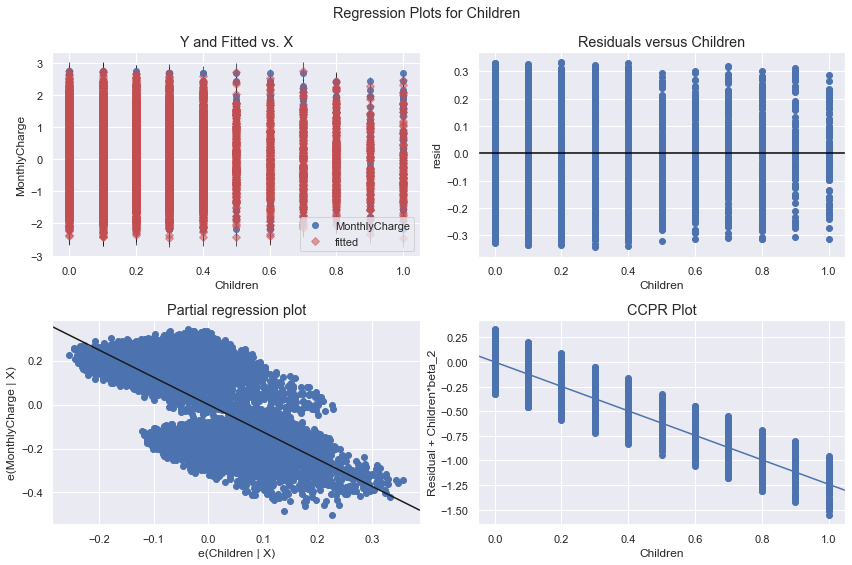

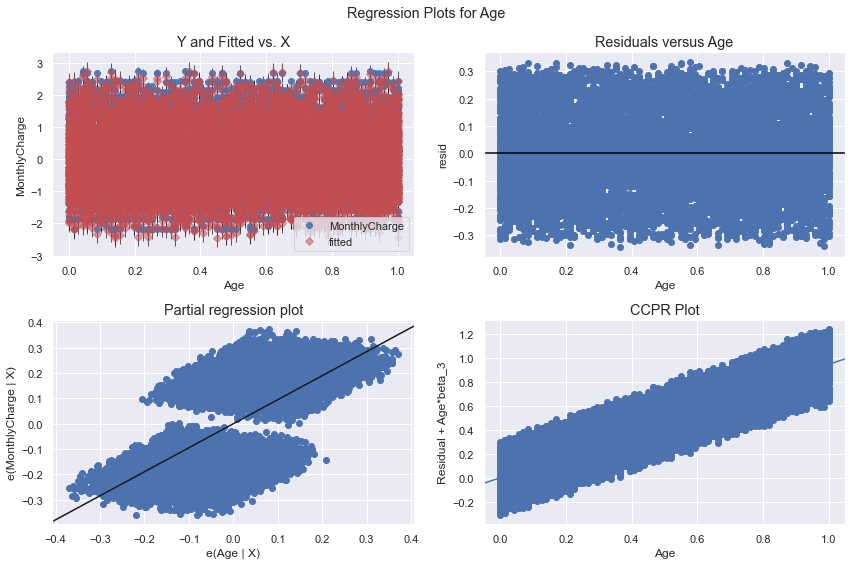

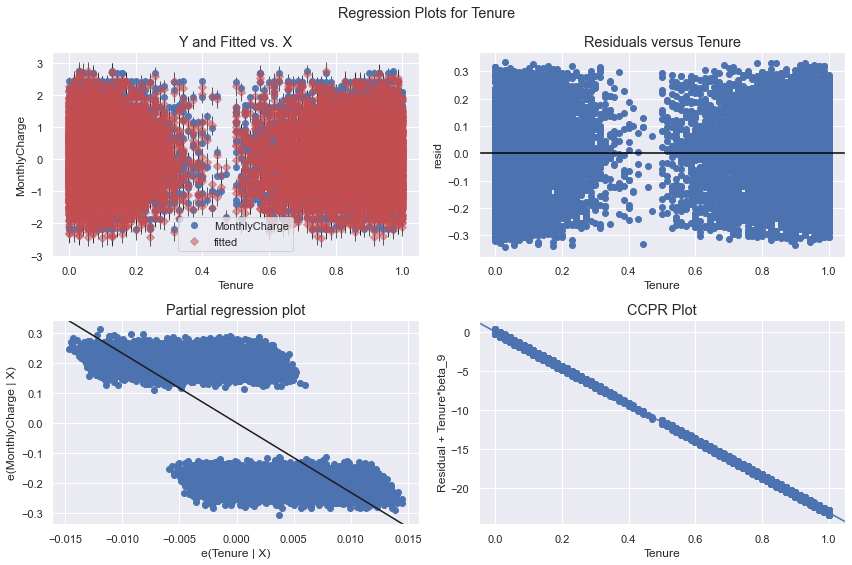

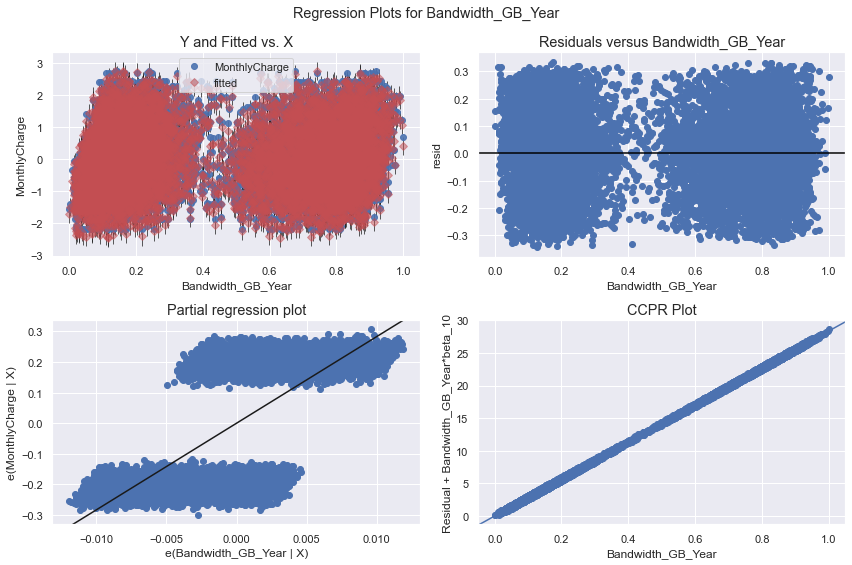

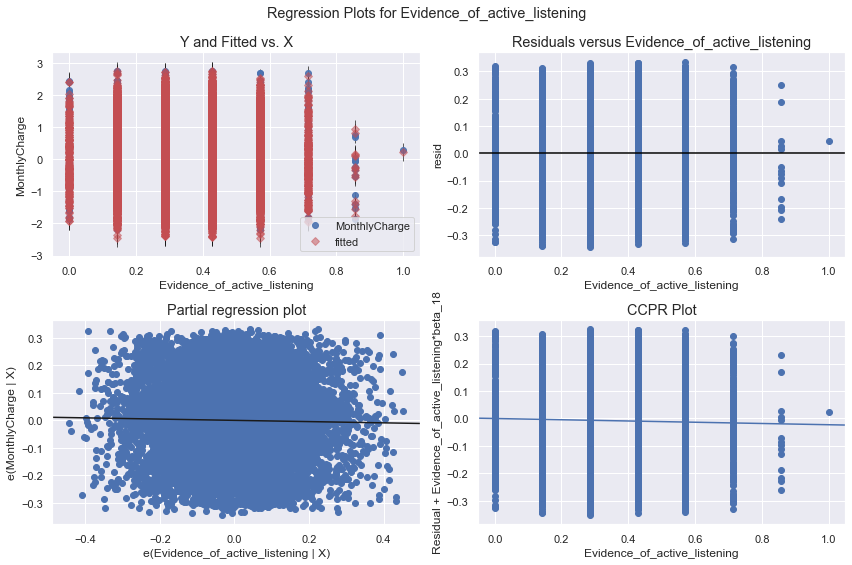

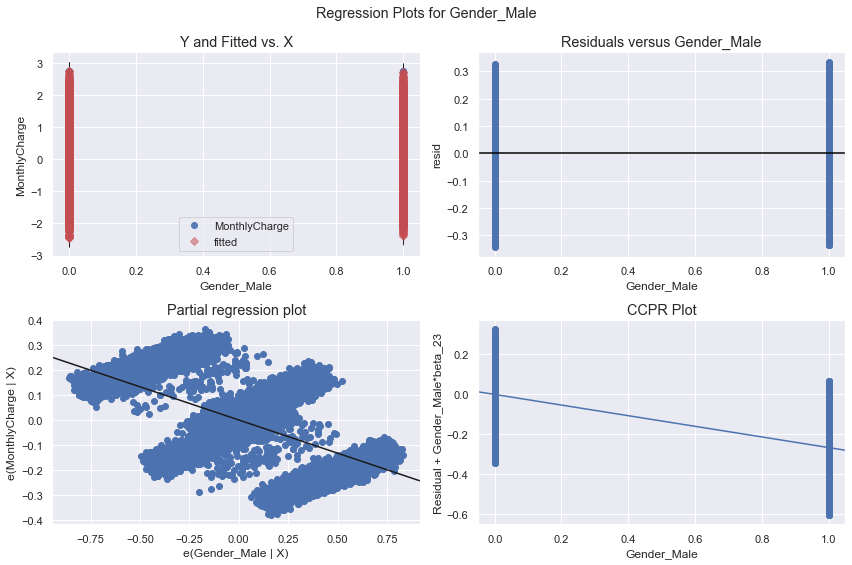

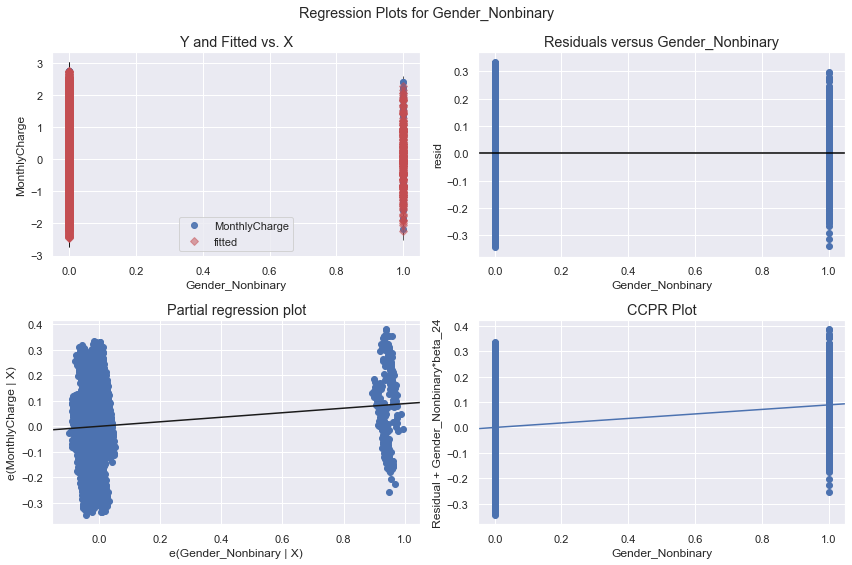

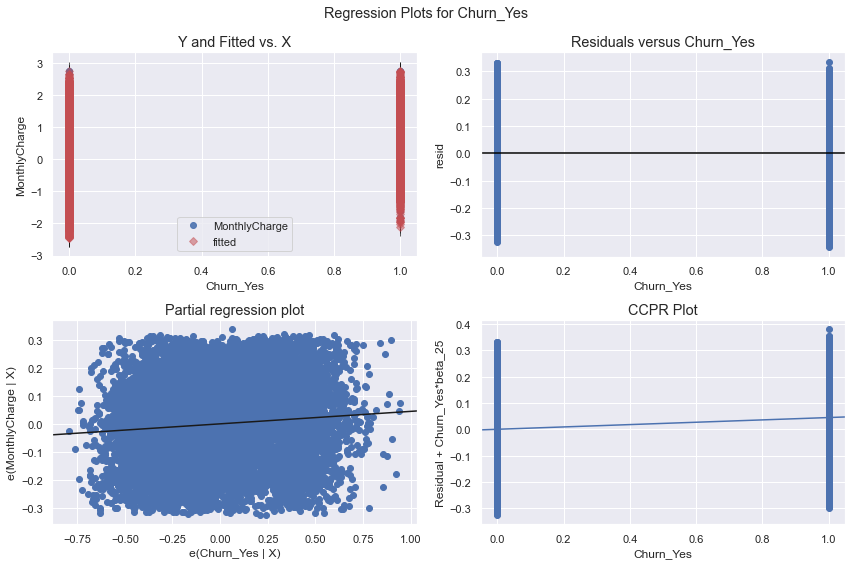

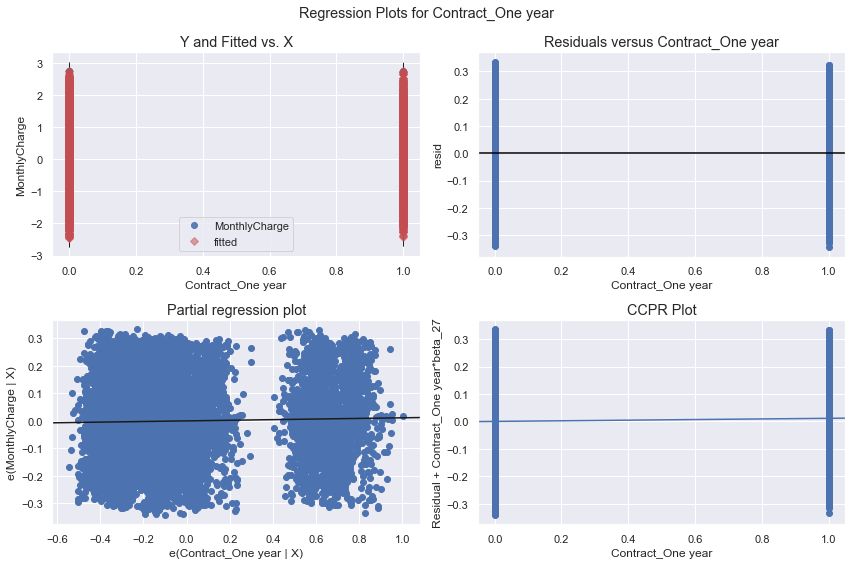

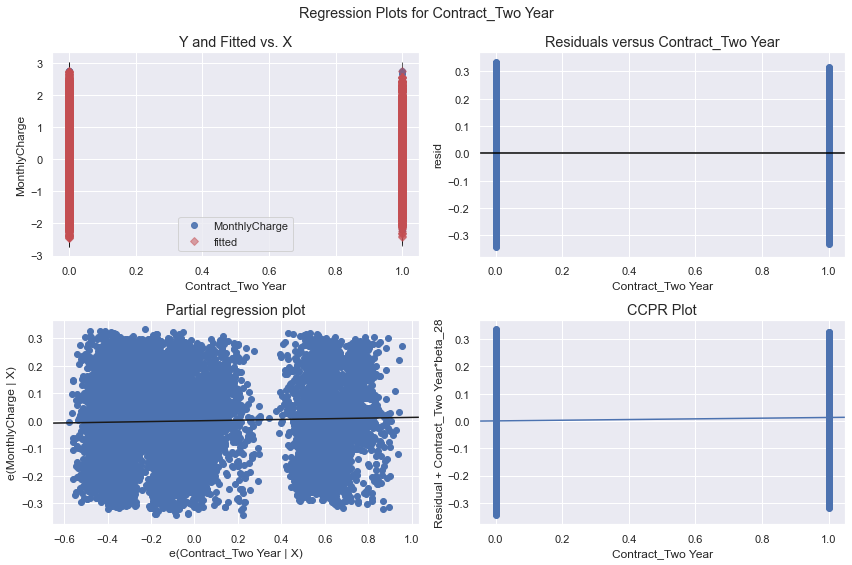

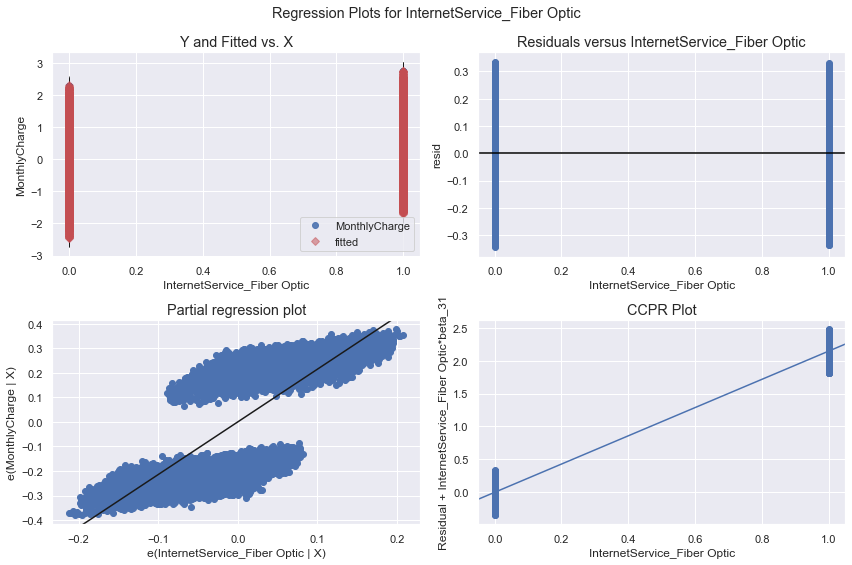

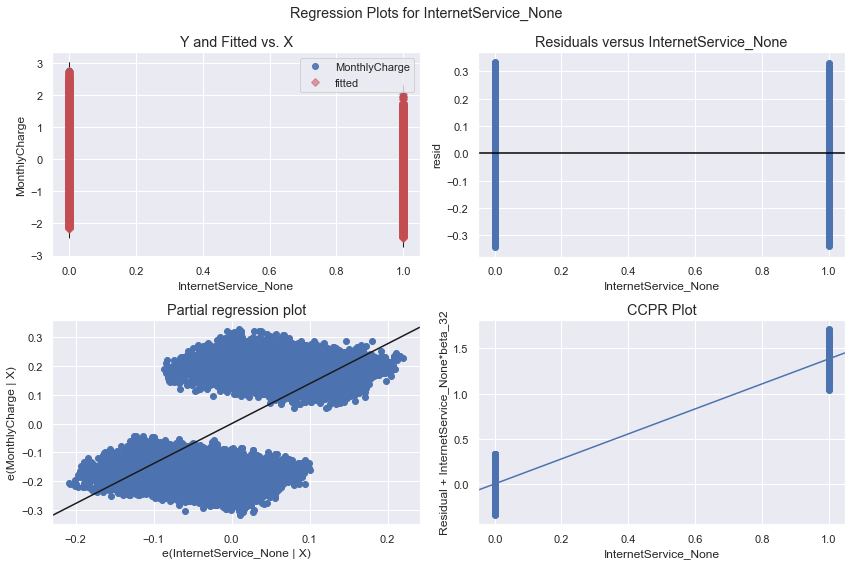

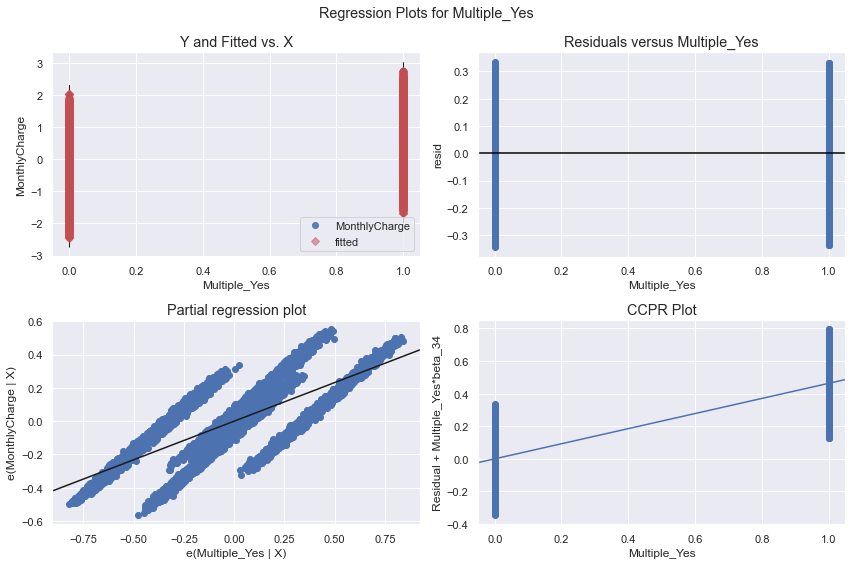

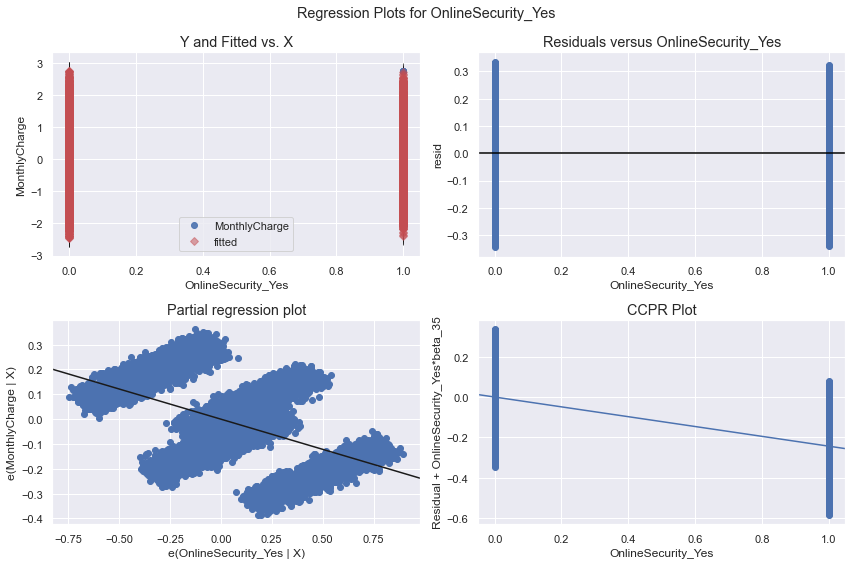

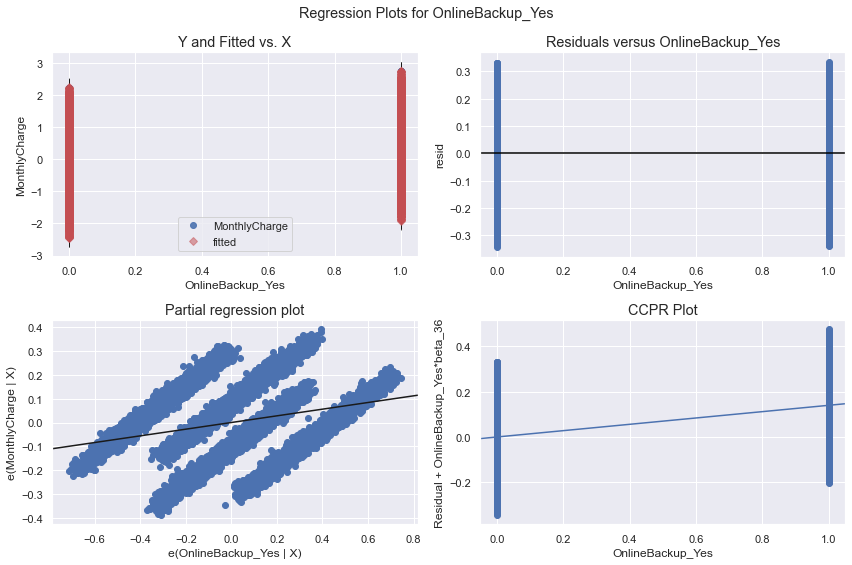

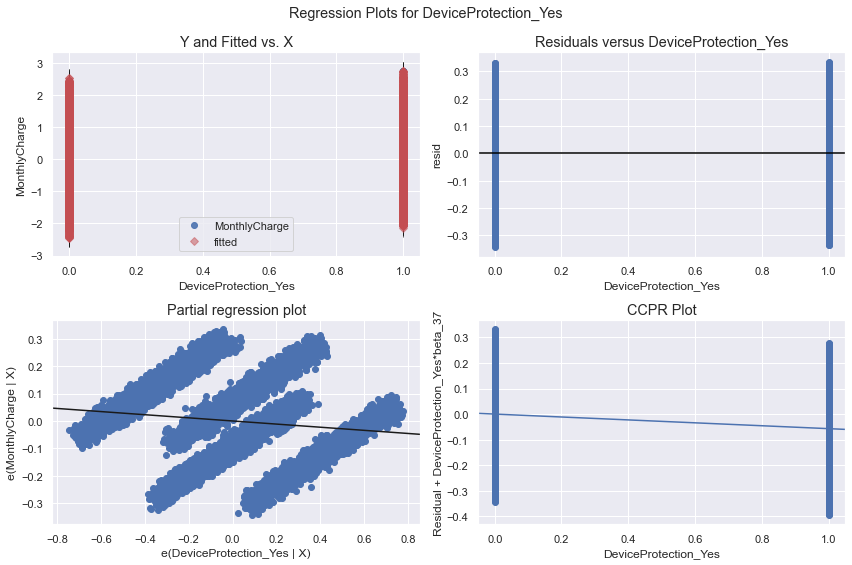

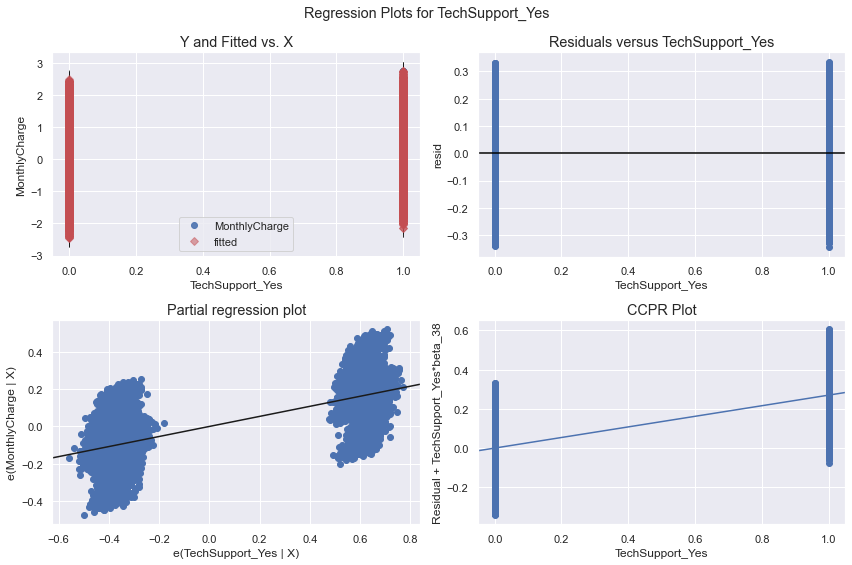

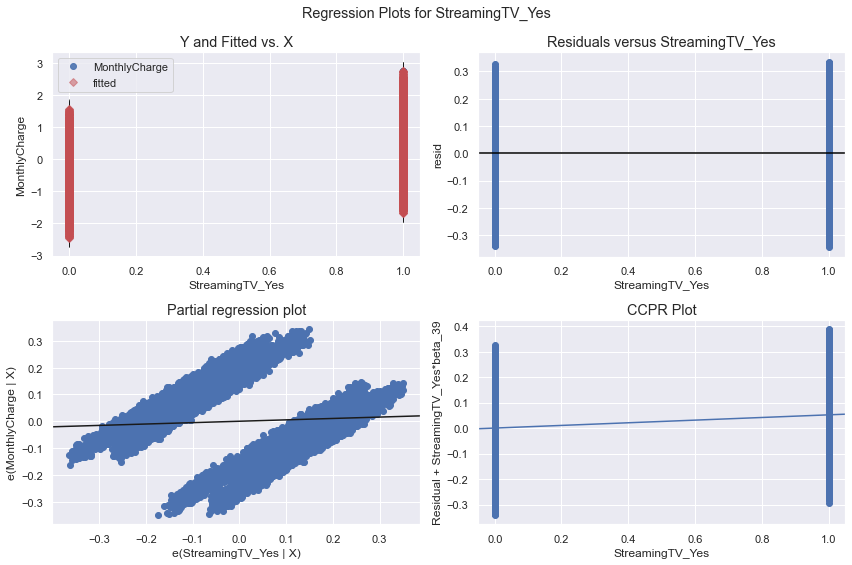

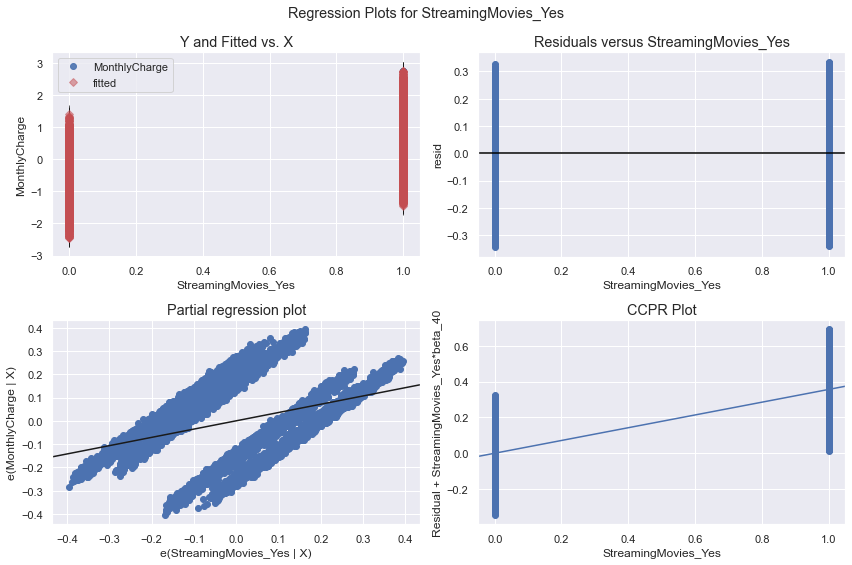

In [38]:
for c in x.columns:
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_regress_exog(model_1, c, fig=fig)

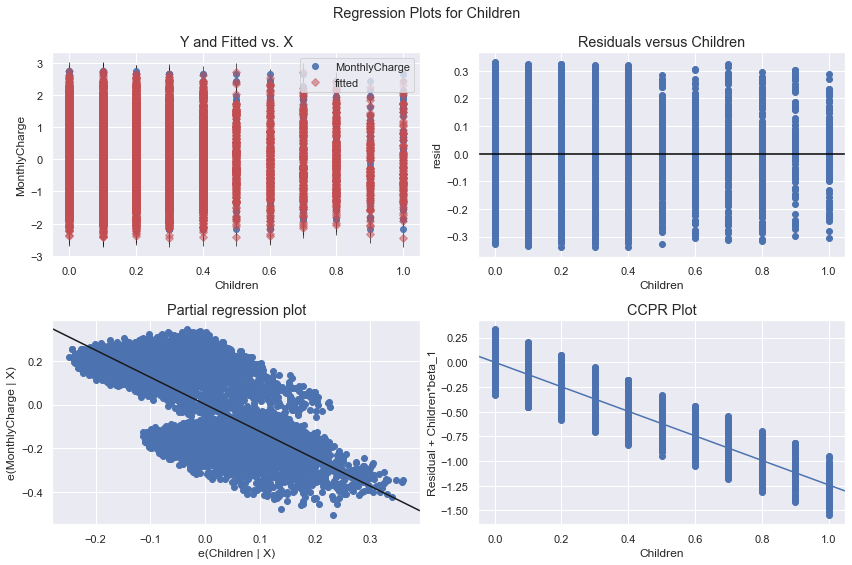

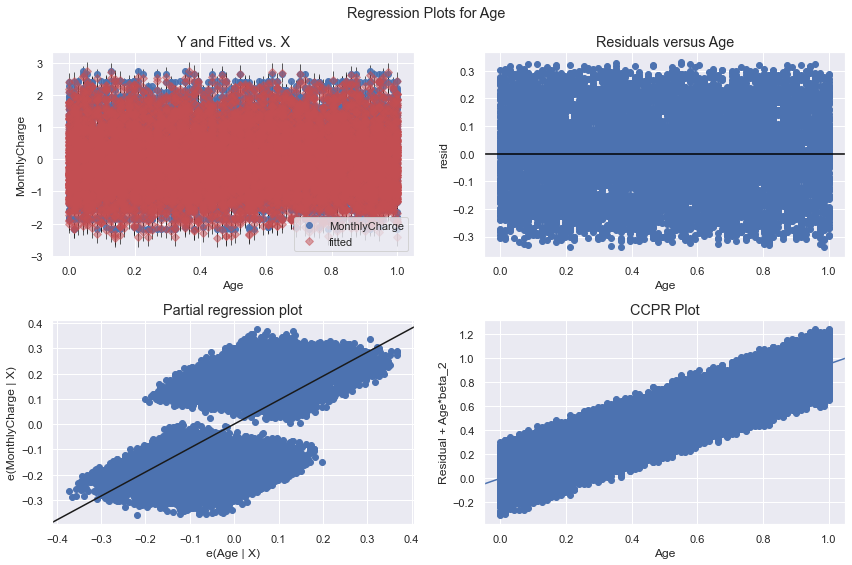

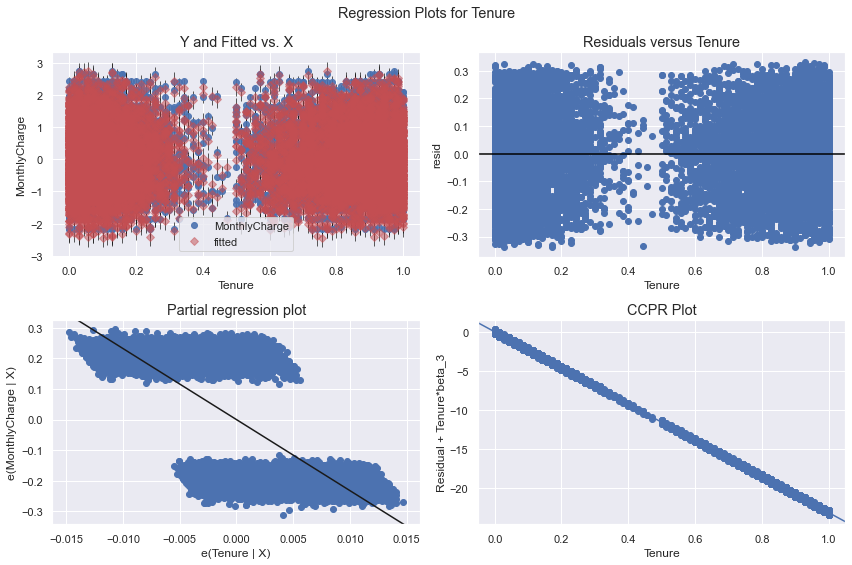

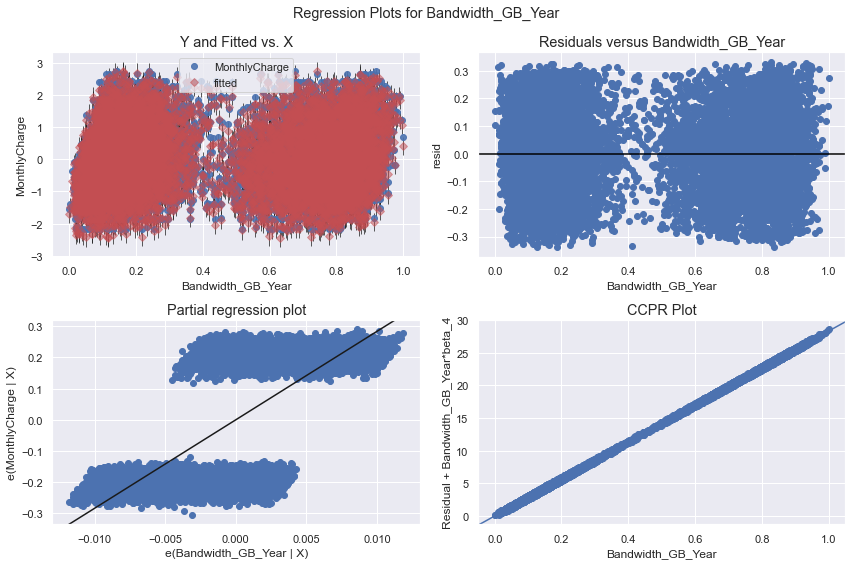

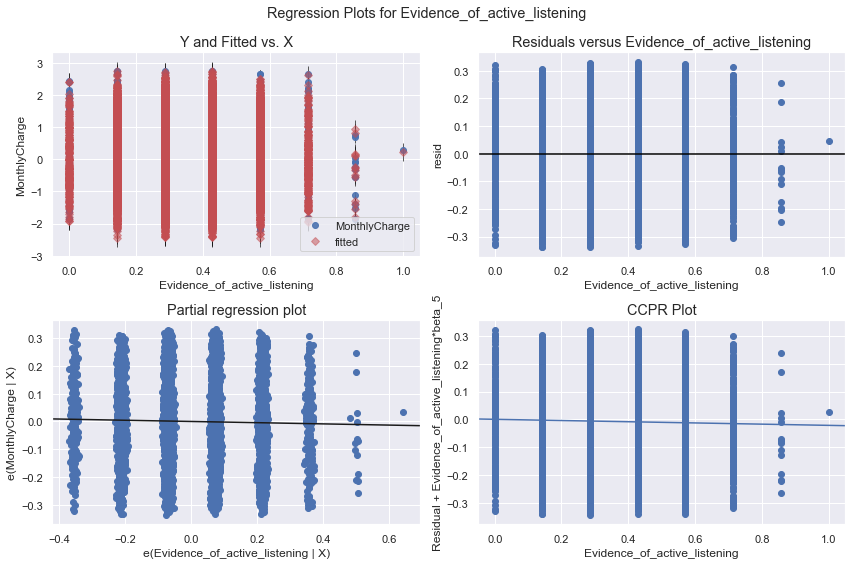

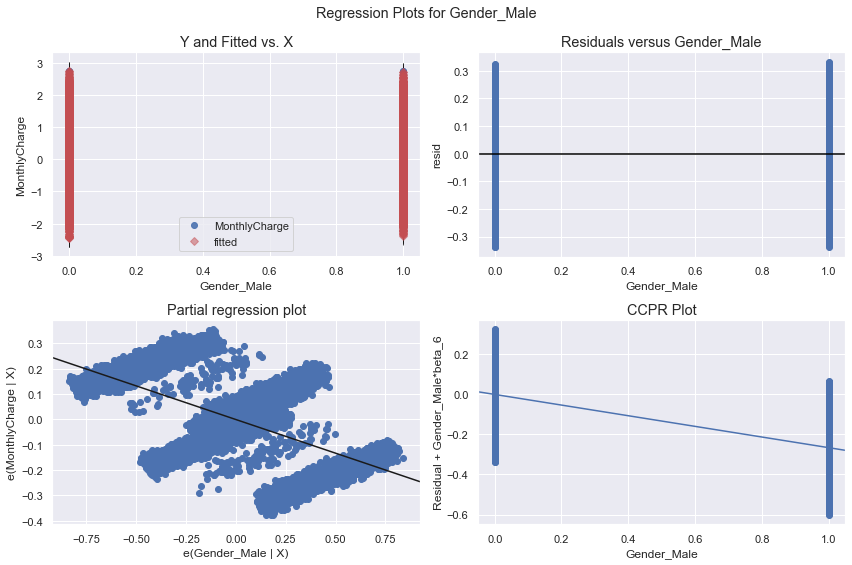

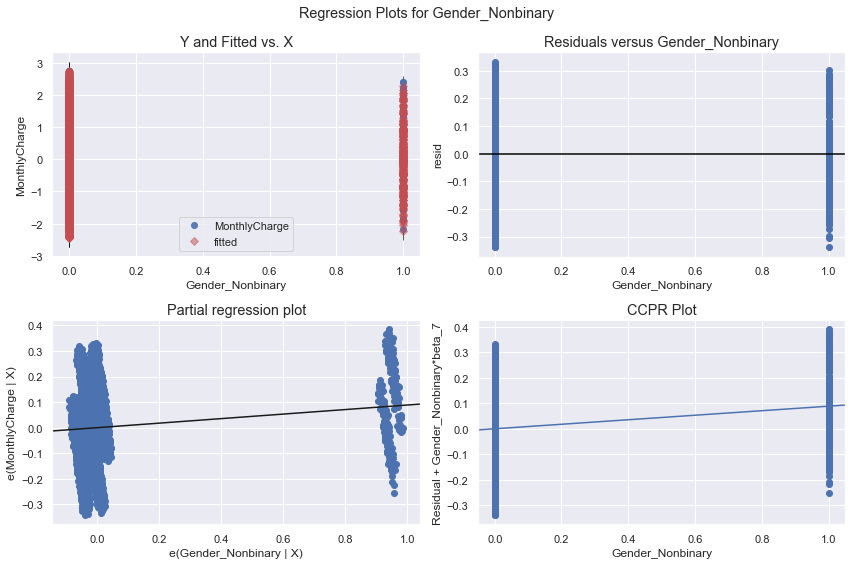

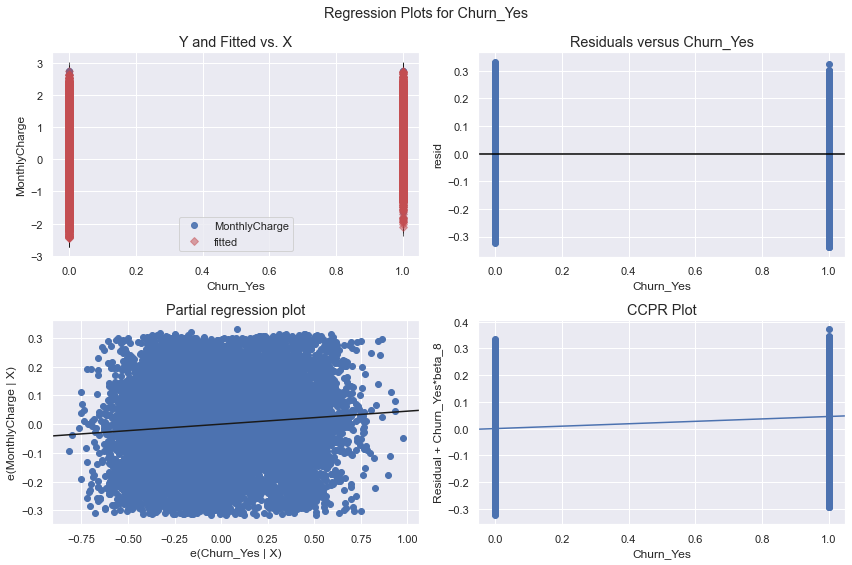

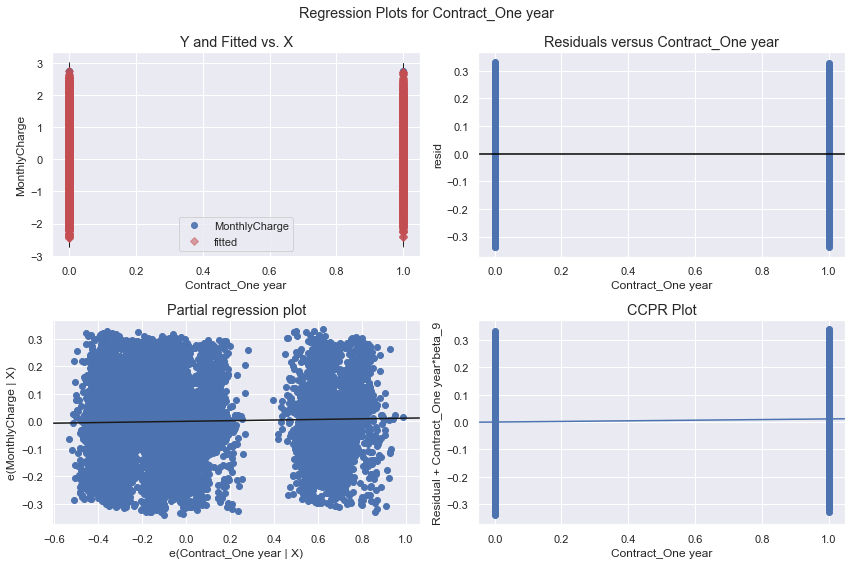

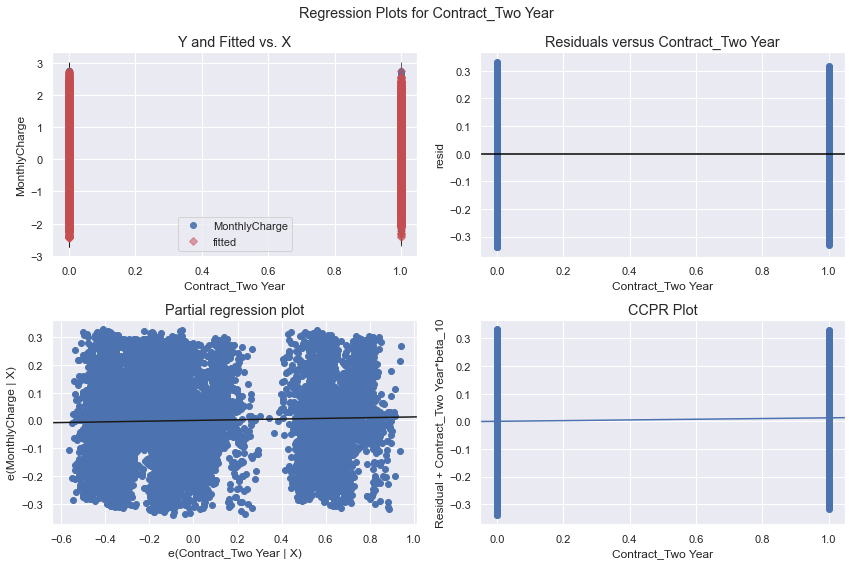

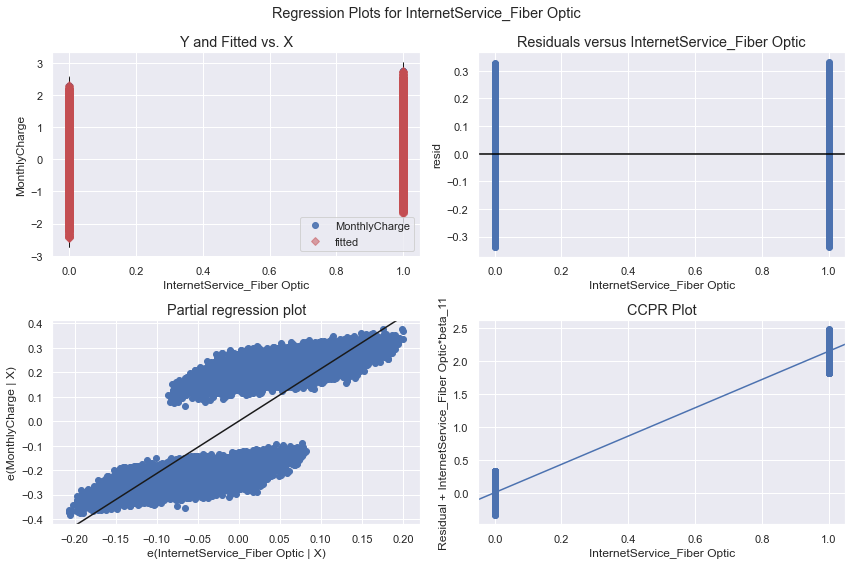

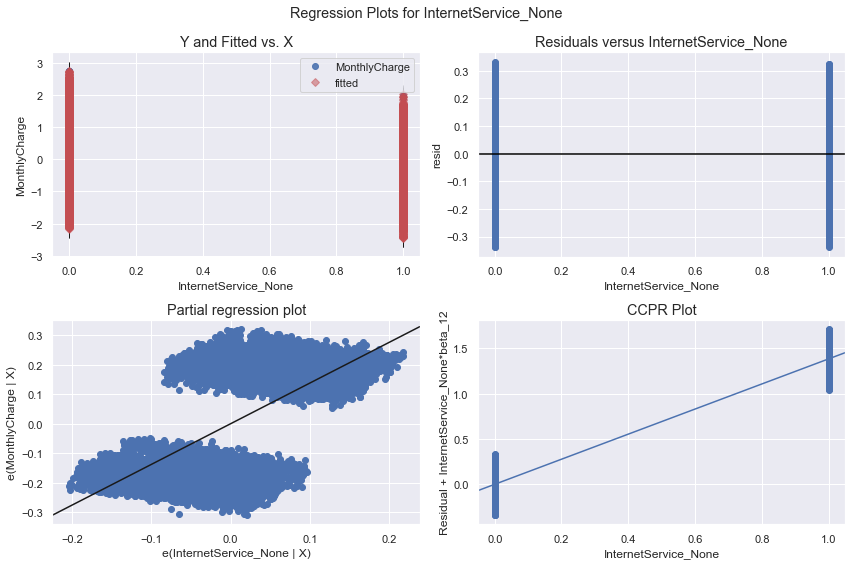

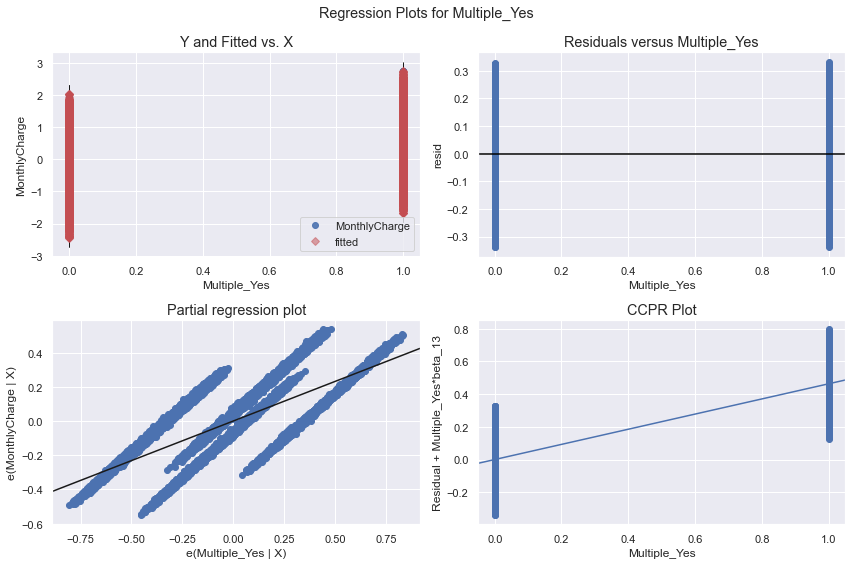

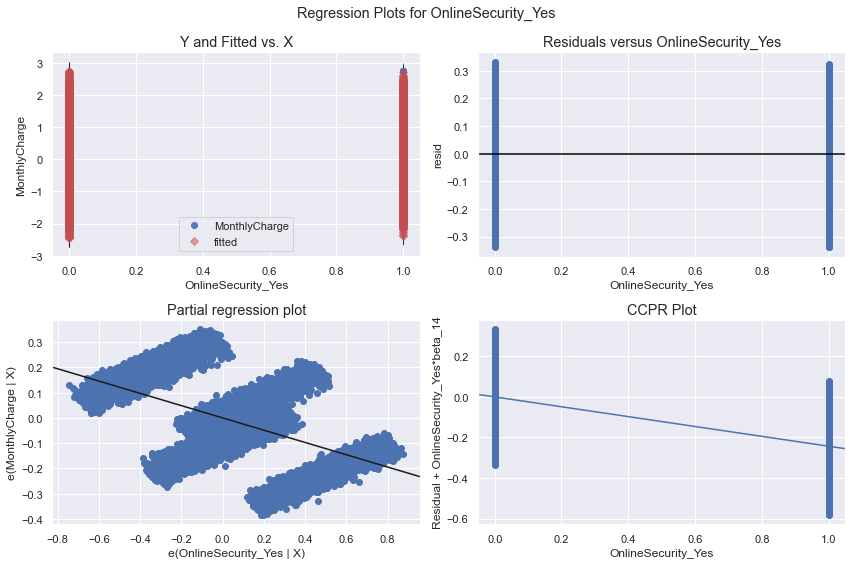

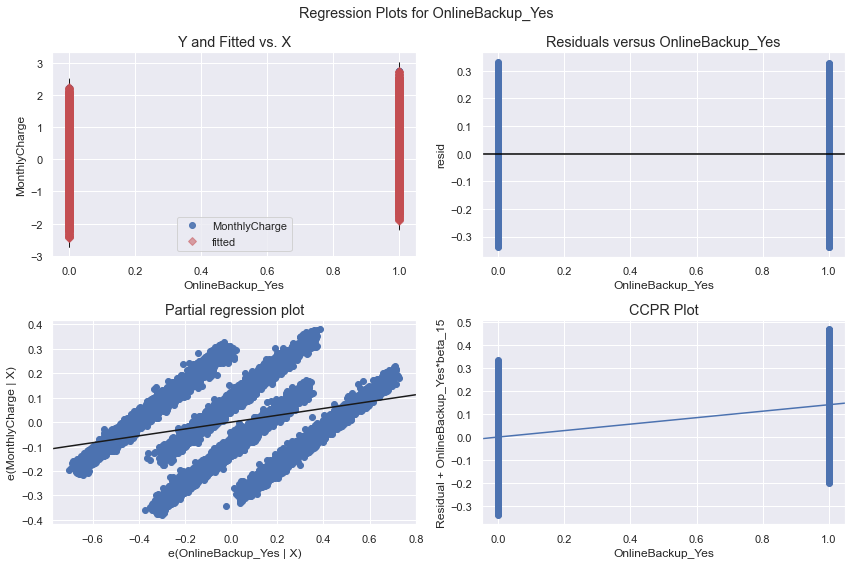

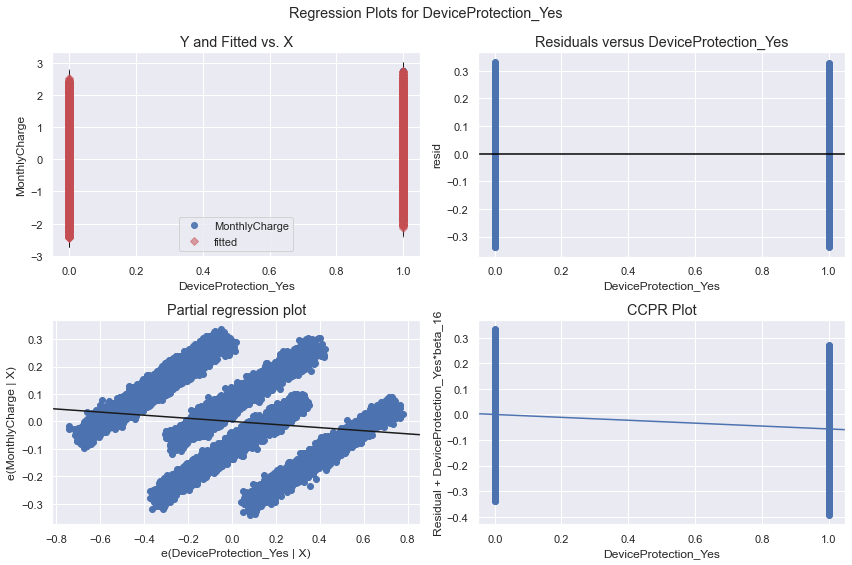

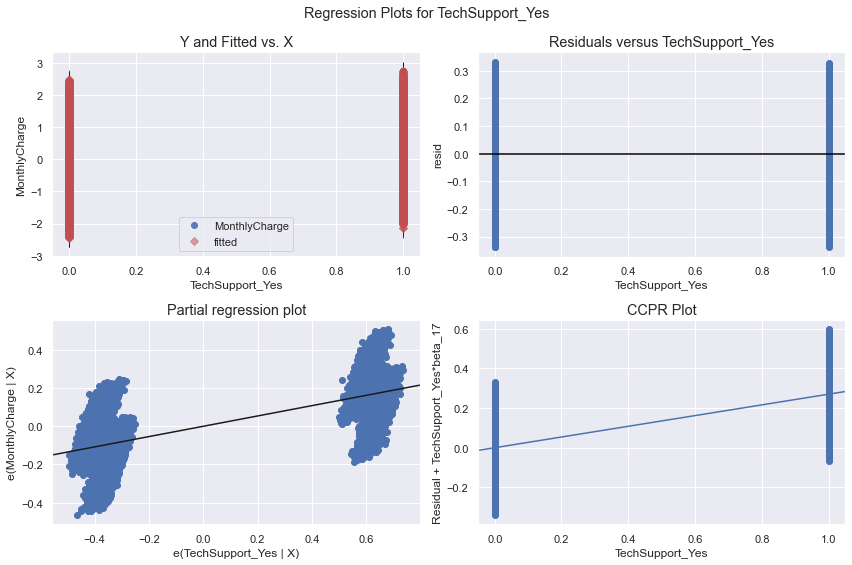

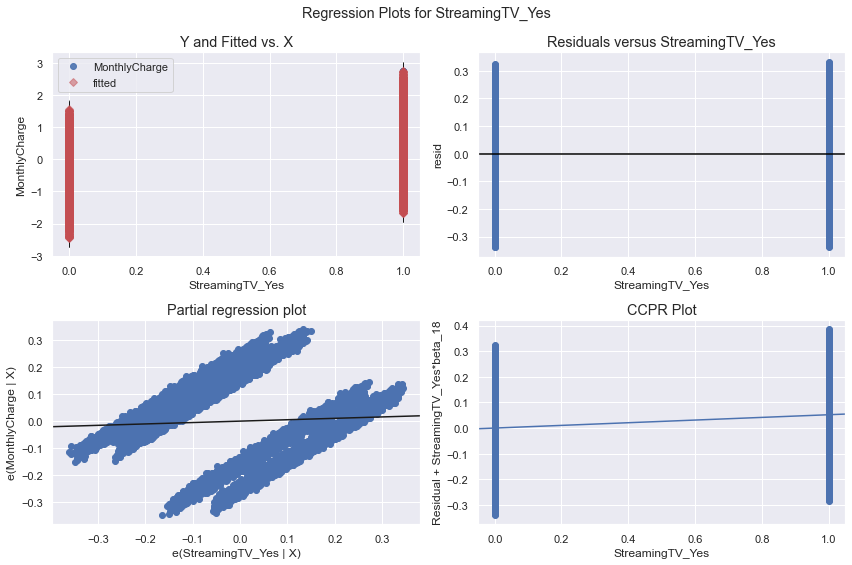

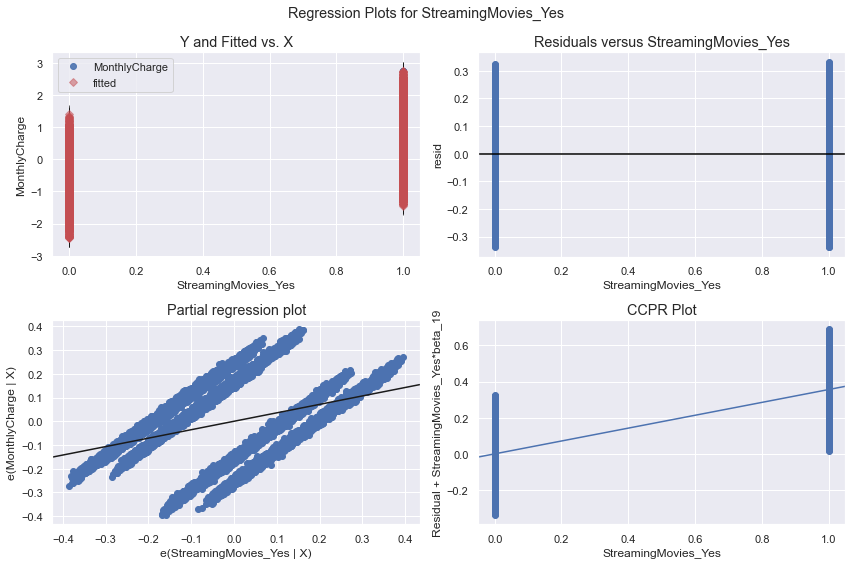

In [39]:
for c in x.columns:
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_regress_exog(model_2, c, fig=fig)

In [41]:
# Calculate mse_orig for model_1
mse_orig = model_1.mse_resid

# Calculate rse_orig for model_1 and print
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)

# Calculate mse_trans model_2
mse_trans = model_2.mse_resid

# Calculate rse_trans for model_2 and print
rse_trans = np.sqrt(mse_trans)
print("RSE of transformed model: ", rse_trans)

RSE of original model:  0.145118520748622
RSE of transformed model:  0.14504008352841175


# E1 RESULTS
Reviewing results to answer the question what are the predictors related to MonthlyCharges.

The final model uses 19 predictor variables and has an R-squared value of 0.979 which shows a strong correlative quality.  
InternetService_Fiber Optic and Multiple_Yes have the 2 highest t scores showing statistical significance. 


Reviewing plots there are some insights:
Negative relationship between Number of children and MonthlyCharge
Positive relationship between Age and MonthlyCharge
Male and Monthly Charge shows a Negative relationship and give a demonstration of Simpsons paradox where indiviual bins may look positive but as a whole it is negative. 
InternetService_Fiber Optic and Multipl_Yes displays a strong positive relationship, reinforcing the high t score.


A regression equation for the reduced model
The F-Statistic score 2.449e+04 falls under the threshhold of 2.6 that I would prefer to remove chance of error. So while there is strong correlative qualities there is a chance of error. 

Interpretation of the coefficients
As expected there is a strong coefficent qualities for Bandwidth_GB_Year and Tenure. 
additional insight comes in high numbers for Children, Internet_Fiber_Optic, and Internet Service None

Discussion of the practical significance of the model.
Based on Theory that MonthlyCharge is tied to Churn via the fact tha Tenure is strongly correlated to Bandwidth_GB and Tenure is perfectly correlated with Churn. It can be determined that Number of Children is a factor in Monthly Chage meaning less likelyhood of Churn. There is an opportunity with increasing Internet_Fiber_Optic to increase Tenure.  


Limitations of the analysis.
This approach only reviews the mean around the dependent variable and is sensitive to outlier. Linear regression only reviews linear relationships and misses opportunities to review curve. 














# F2 RECOMMENDATION

Linear regression relys on continuous dependent variable. This will show a linear relationship between independent(continuous or discrete) and dependent variables. In this data set where Churn is trying to be predicted or what may cause churn, there are strong correlations to Tenure, Bandwidth_GB_Year and MonthlyCharges. While these attributes are not binary they are not substantially continouse enough to expose solutions to the problem as well as a Logistic Regression may. Becuase the data has little spread on continuous attributes or binary attributes, I recommend further analysis be performed using Logistic regression. 

If only this model was to be used there is neglible indicators that Timely Response and Respectful_response are predictors with MonthlyCharge. The insight here may be that the more someone spends the better they expect the customer service to be despite the size of family or number of devices. 